In [4]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [5]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


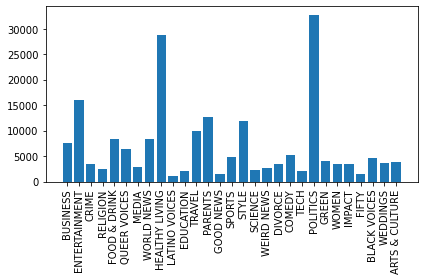

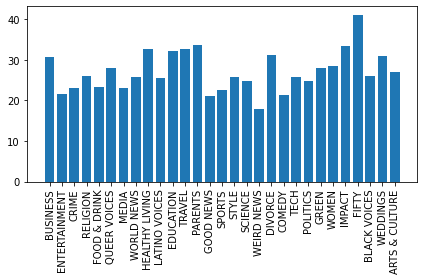

In [6]:
import random
import matplotlib
import matplotlib.pyplot as plt 

path = os.getcwd()
folder = "figs"
FILE = "Number_of_articles_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "Words_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

In [7]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:3
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [30]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    list_of_sentences.append(sentences)
    labels.append(label)
    '''for sentence in sentences:
        if len(sentence.split(" ")) >= 5:
            list_of_sentences.append(sentence)
            labels.append(label)'''
            
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
print(len(labels))



200882
200882


In [13]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)
label_values = list(index_class_map_dict1.values())

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [31]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [33]:
from sentence_transformers import SentenceTransformer, models, InputExample, losses

word_embedding_model = models.Transformer('distilbert-base-uncased', max_seq_length=512)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model], device = "cuda:3")

In [34]:
embeddings = model.encode(list_of_sentences, show_progress_bar = True)
print(embeddings.shape)

Batches:   0%|          | 0/6278 [00:00<?, ?it/s]

(200882, 768)


In [35]:
count_of_labels=[]
l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27,l28 = ([] for i in range(29))
for i in number_labels:
    if i==0:
        l0.append(i)
    if i==1:
        l1.append(i)
    if i==2:
        l2.append(i)
    if i==3:
        l3.append(i)
    if i==4:
        l4.append(i)
    if i==5:
        l5.append(i)
    if i==6:
        l6.append(i)
    if i==7:
        l7.append(i)
    if i==8:
        l8.append(i)
    if i==9:
        l9.append(i)
    if i==10:
        l10.append(i)
    if i==11:
        l11.append(i)
    if i==12:
        l12.append(i)
    if i==13:
        l13.append(i)
    if i==14:
        l14.append(i)
    if i==15:
        l15.append(i)
    if i==16:
        l16.append(i)
    if i==17:
        l17.append(i)
    if i==18:
        l18.append(i)
    if i==19:
        l19.append(i)
    if i==20:
        l20.append(i)
    if i==21:
        l21.append(i)
    if i==22:
        l22.append(i)
    if i==23:
        l23.append(i)     
    if i==24:
        l24.append(i)
    if i==25:
        l25.append(i)
    if i==26:
        l26.append(i)
    if i==27:
        l27.append(i)
    if i==28:
        l28.append(i)
count_of_labels.append(len(l0))
count_of_labels.append(len(l1))
count_of_labels.append(len(l2))
count_of_labels.append(len(l3))
count_of_labels.append(len(l4))
count_of_labels.append(len(l5))
count_of_labels.append(len(l6))
count_of_labels.append(len(l7))
count_of_labels.append(len(l8))
count_of_labels.append(len(l9))
count_of_labels.append(len(l10))
count_of_labels.append(len(l11))
count_of_labels.append(len(l12))
count_of_labels.append(len(l13))
count_of_labels.append(len(l14))
count_of_labels.append(len(l15))
count_of_labels.append(len(l16))
count_of_labels.append(len(l17))
count_of_labels.append(len(l18))
count_of_labels.append(len(l19))
count_of_labels.append(len(l20))
count_of_labels.append(len(l21))
count_of_labels.append(len(l22))
count_of_labels.append(len(l23))
count_of_labels.append(len(l24))
count_of_labels.append(len(l25))
count_of_labels.append(len(l26))
count_of_labels.append(len(l27))
count_of_labels.append(len(l28))

In [36]:
print(set(l0))
print(set(l1))
print(set(l2))
print(set(l3))
print(set(l4))
print(count_of_labels)
sum=0
for x in count_of_labels:
    sum+= x
print(len(number_labels))
print(sum)      

{0}
{1}
{2}
{3}
{4}
[7645, 16059, 3406, 2557, 8323, 6315, 2816, 8421, 28717, 1130, 2149, 9888, 12633, 1399, 4885, 11904, 2179, 2671, 3427, 5176, 2083, 32740, 3946, 3491, 3460, 1402, 4529, 3652, 3879]
200882
200882


In [37]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value

print(index_class_map_dict.values())

dict_values(['BUSINESS', 'ENTERTAINMENT', 'CRIME', 'RELIGION', 'FOOD & DRINK', 'QUEER VOICES', 'MEDIA', 'WORLD NEWS', 'HEALTHY LIVING', 'LATINO VOICES', 'EDUCATION', 'TRAVEL', 'PARENTS', 'GOOD NEWS', 'SPORTS', 'STYLE', 'SCIENCE', 'WEIRD NEWS', 'DIVORCE', 'COMEDY', 'TECH', 'POLITICS', 'GREEN', 'WOMEN', 'IMPACT', 'FIFTY', 'BLACK VOICES', 'WEDDINGS', 'ARTS & CULTURE'])


In [38]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, perplexity = 40, n_jobs = -1).fit_transform(embeddings)
print(X_embedded.shape)

(200882, 2)


<ipython-input-50-1c7cec491055>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,15))


['HEALTHY LIVING', 'POLITICS', 'PARENTS', 'COMEDY', 'BUSINESS', 'ENTERTAINMENT', 'BLACK VOICES']


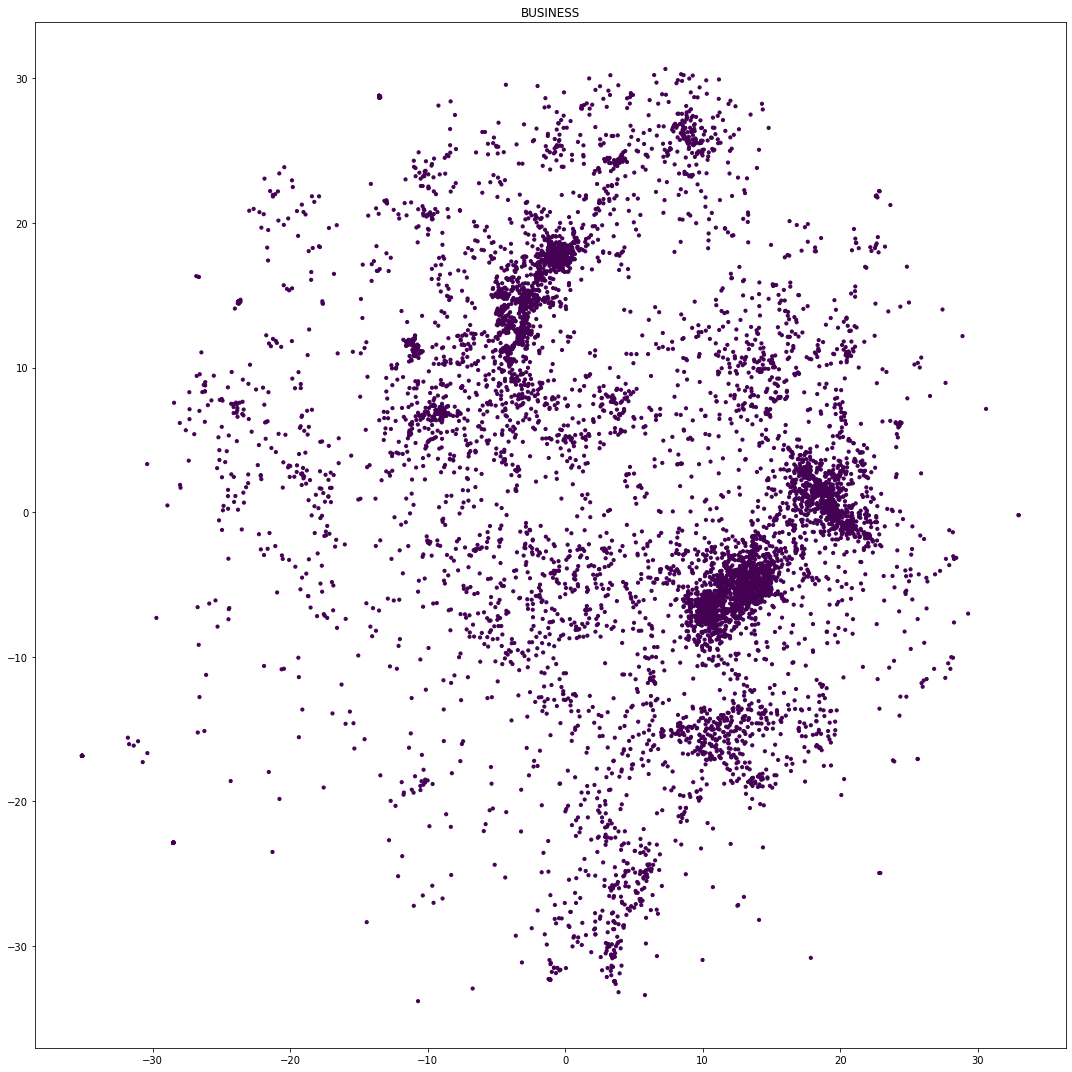

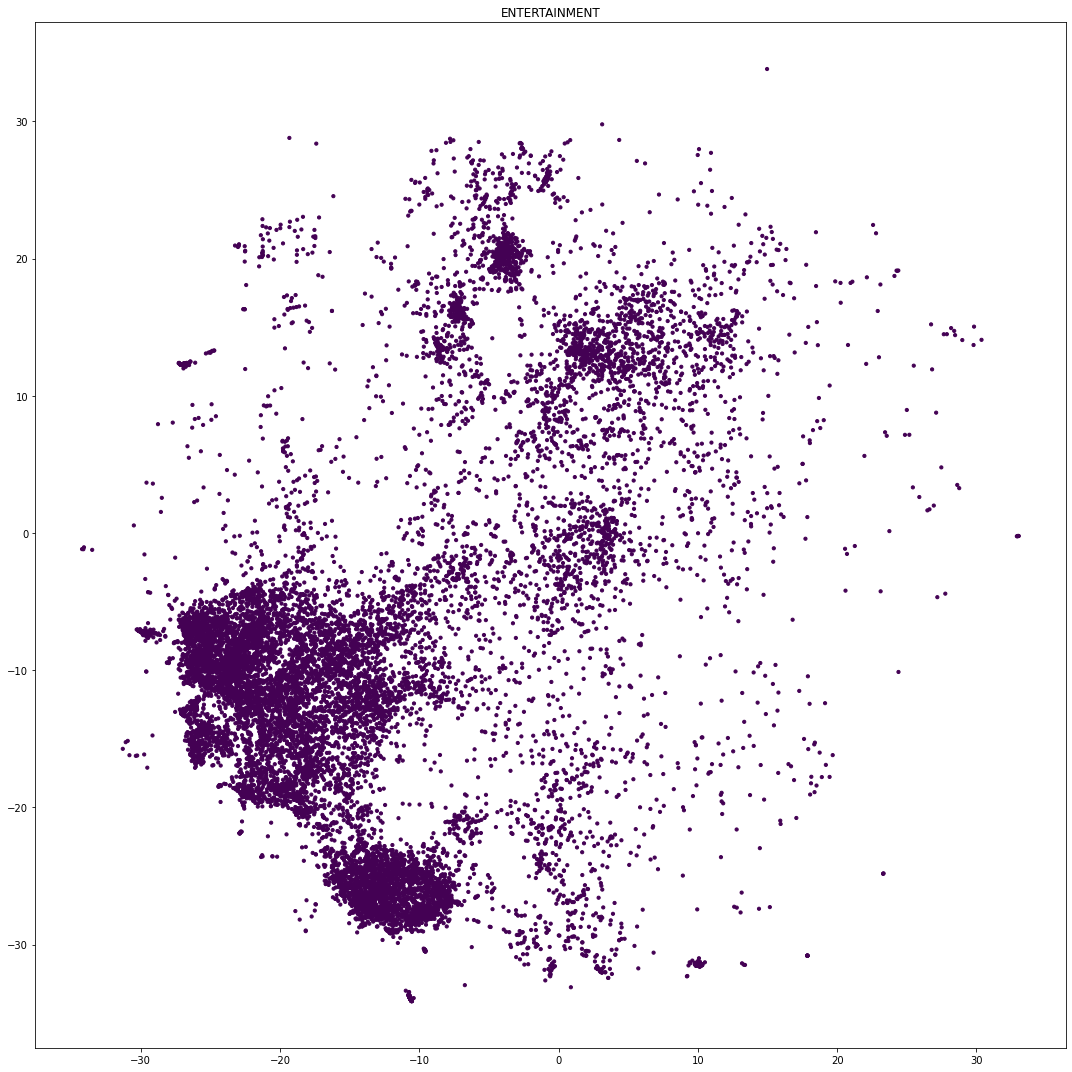

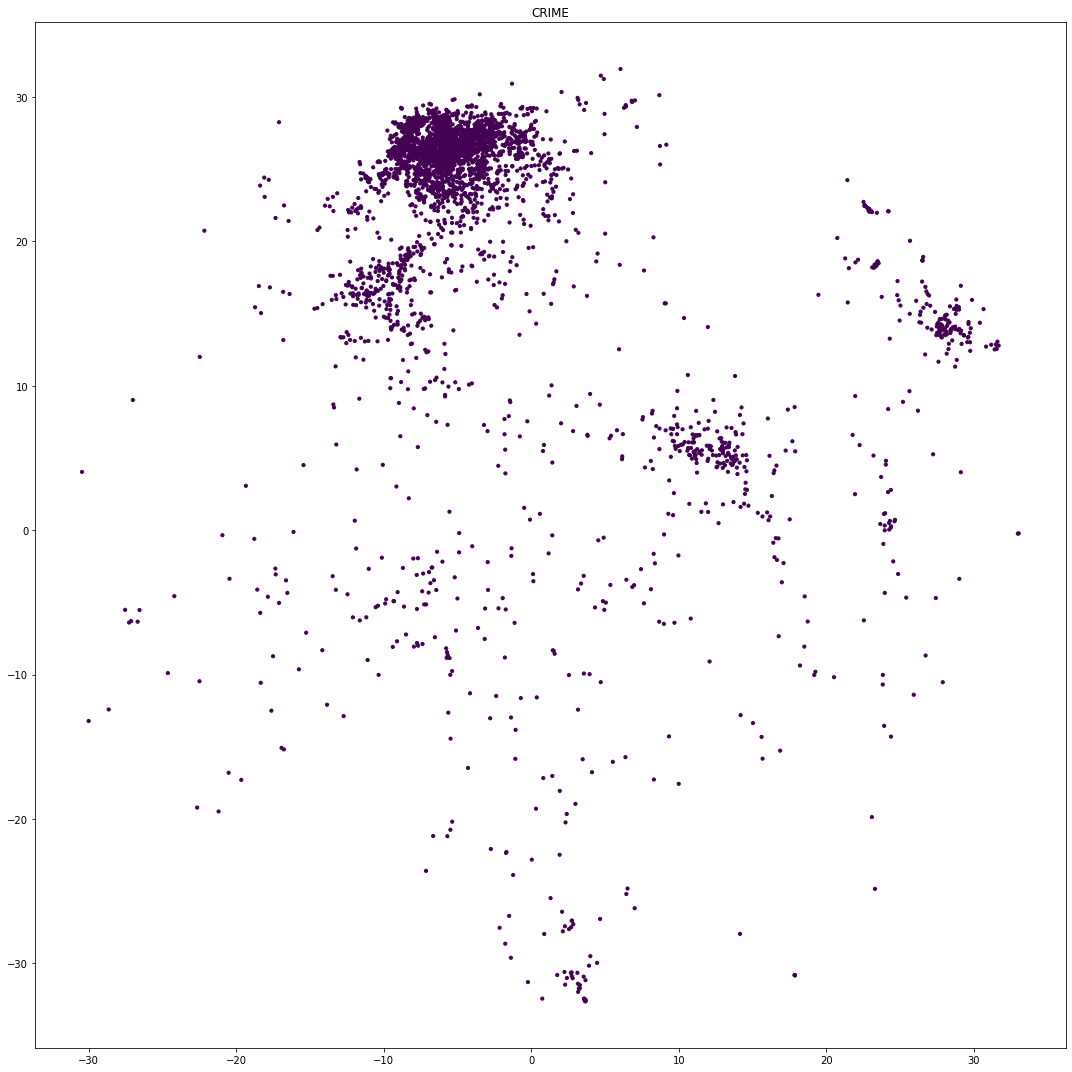

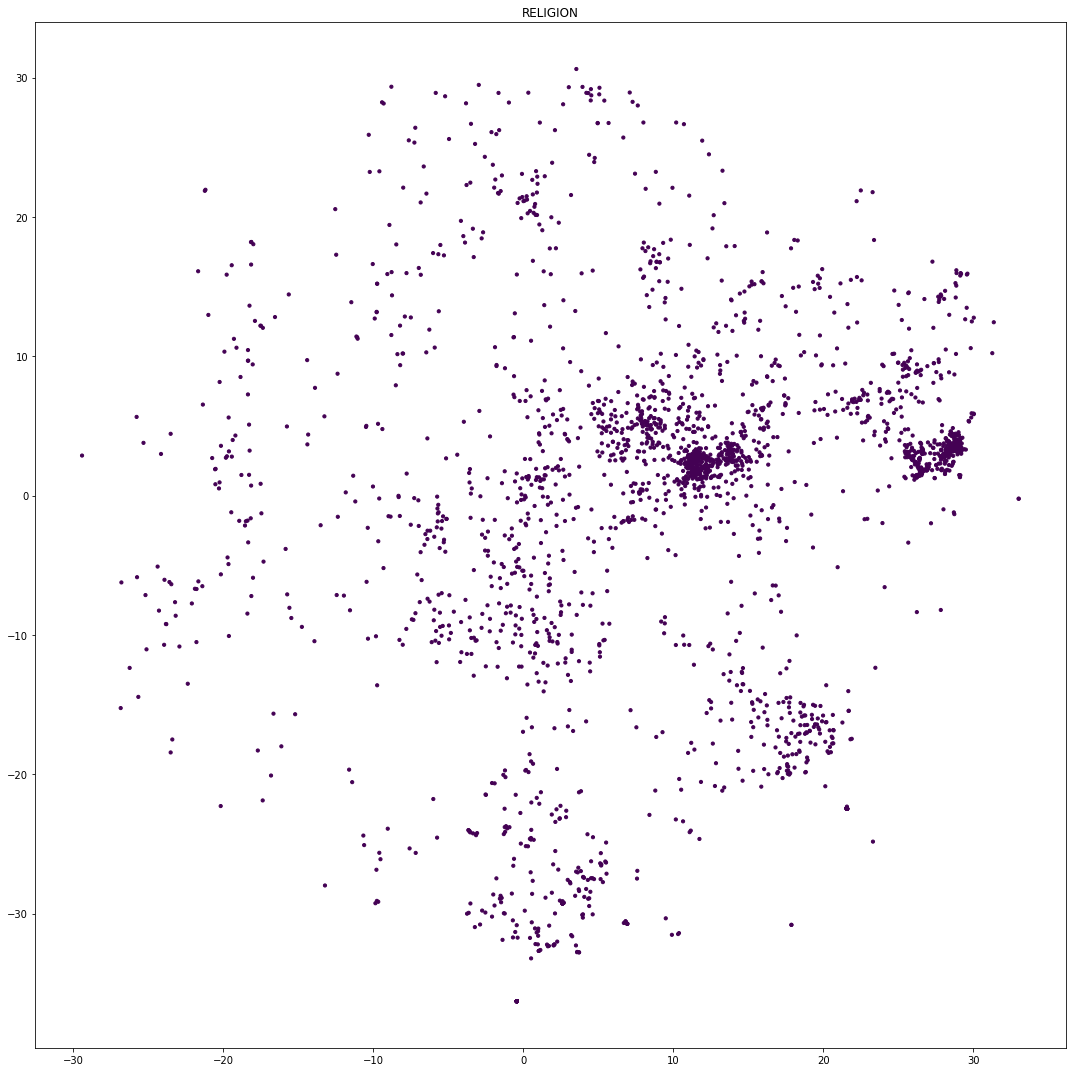

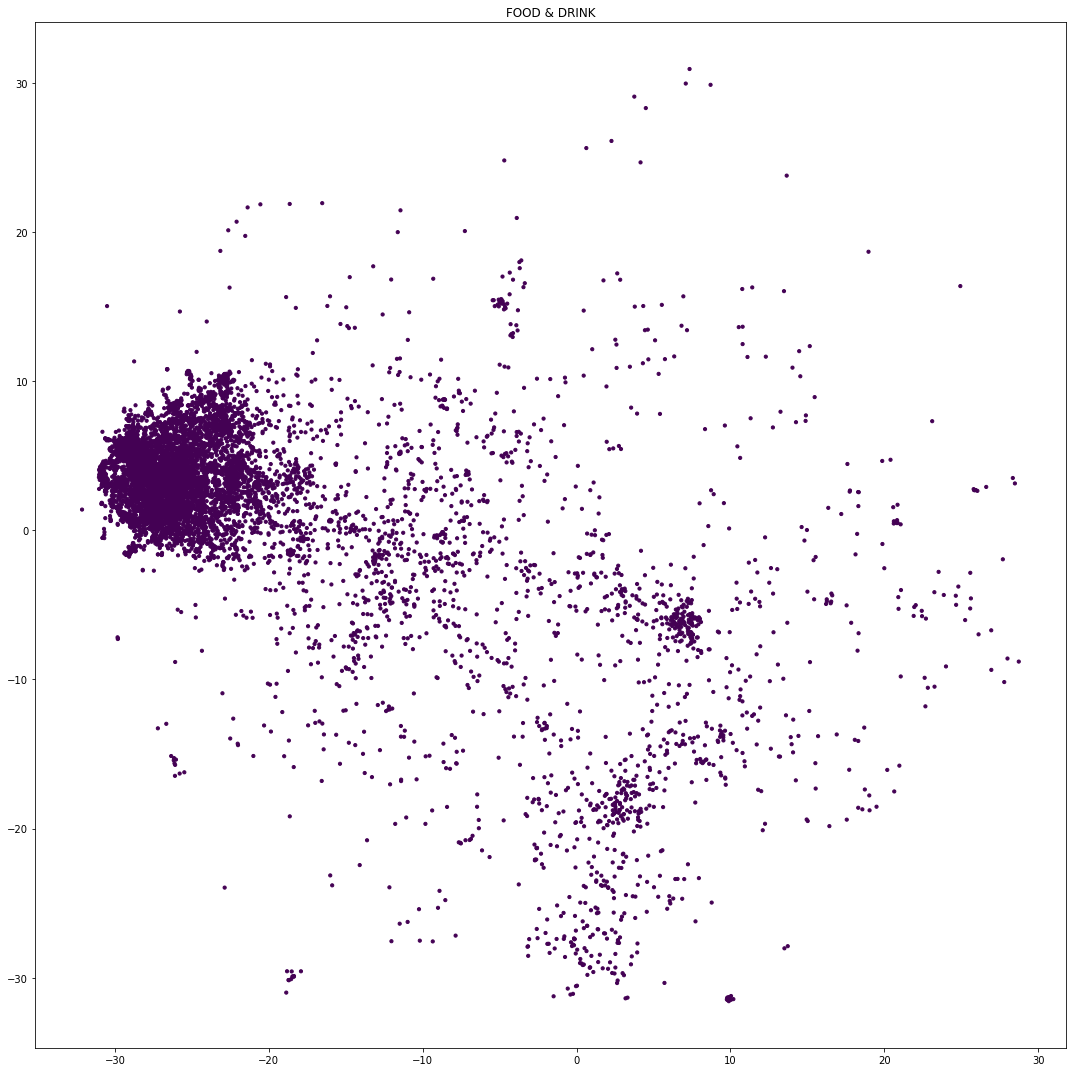

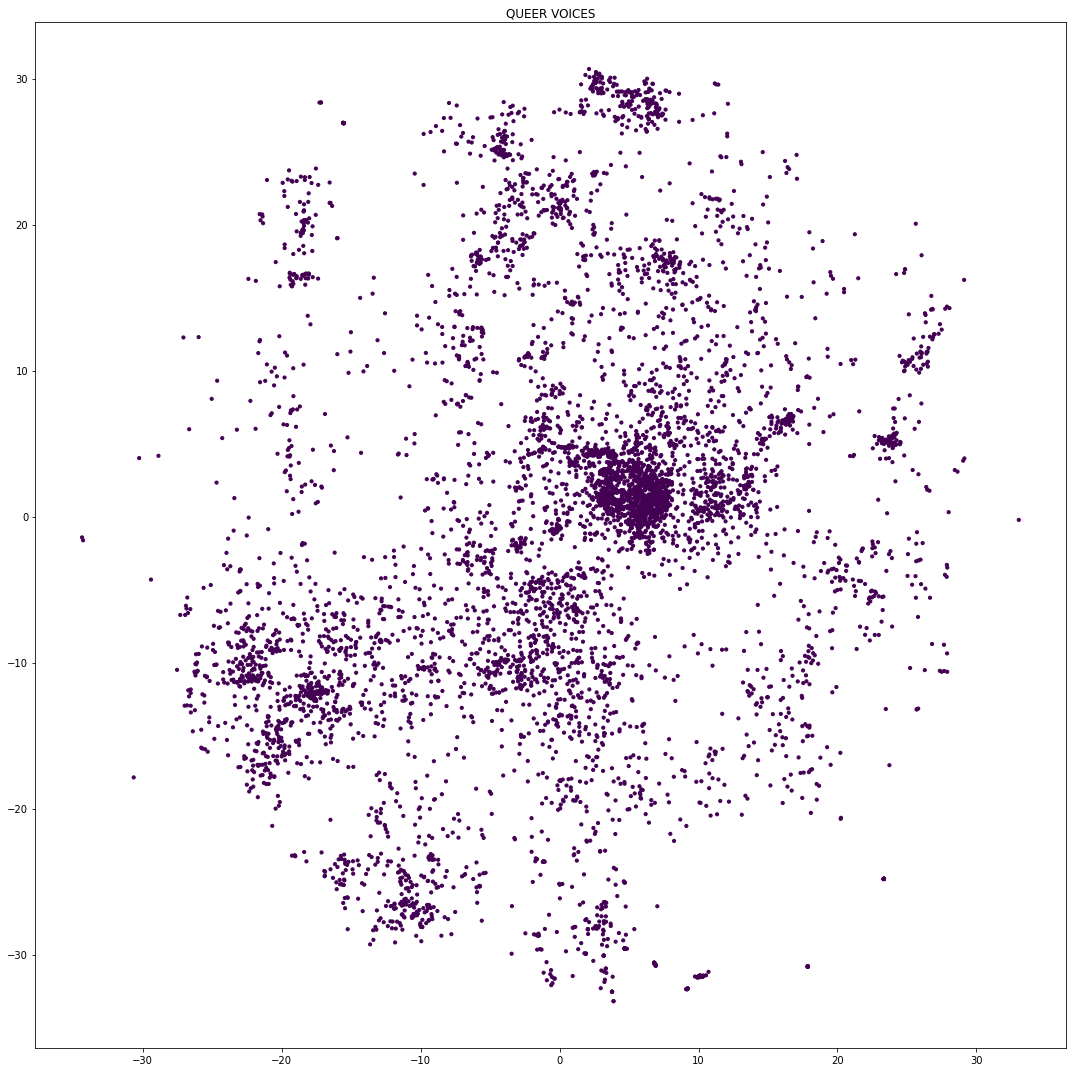

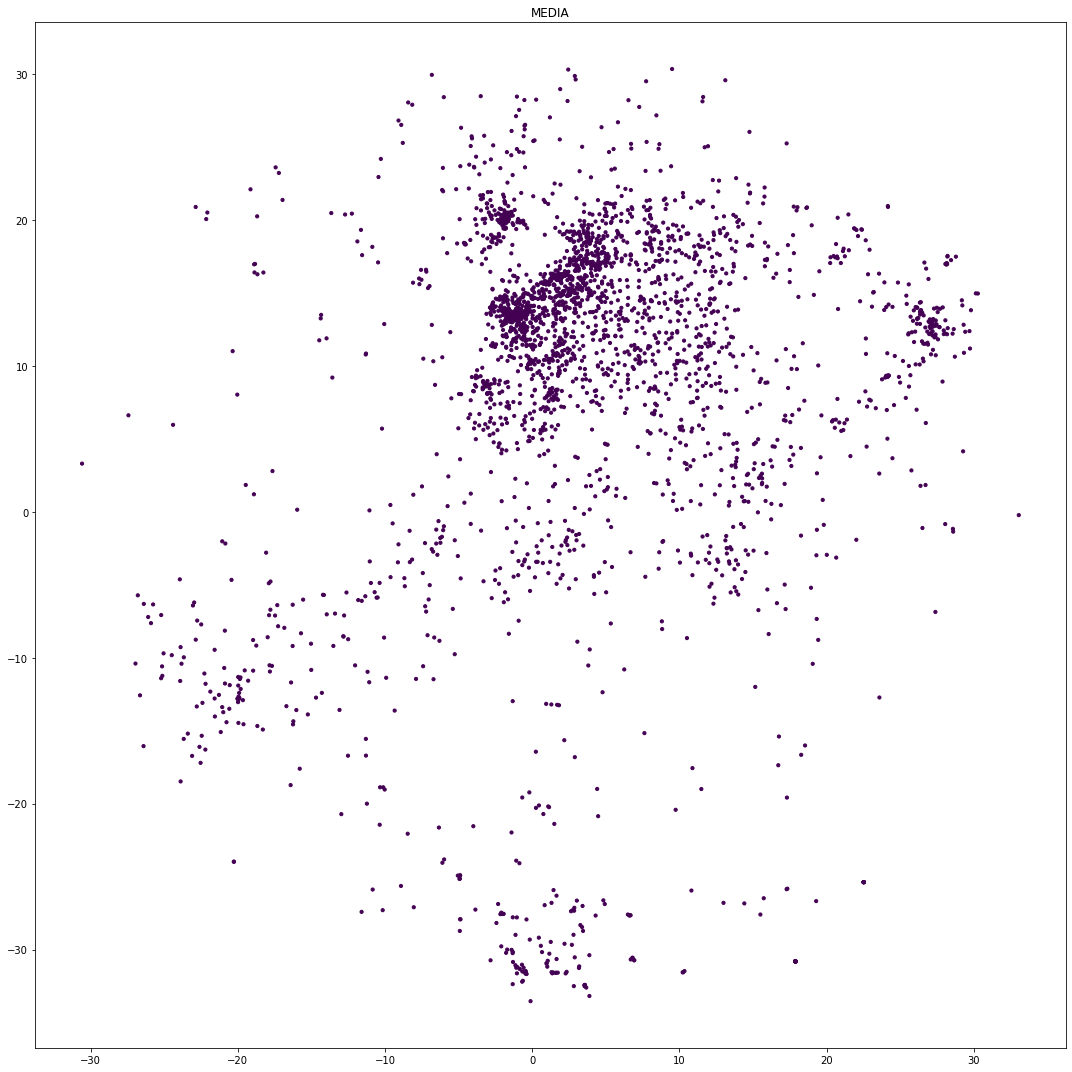

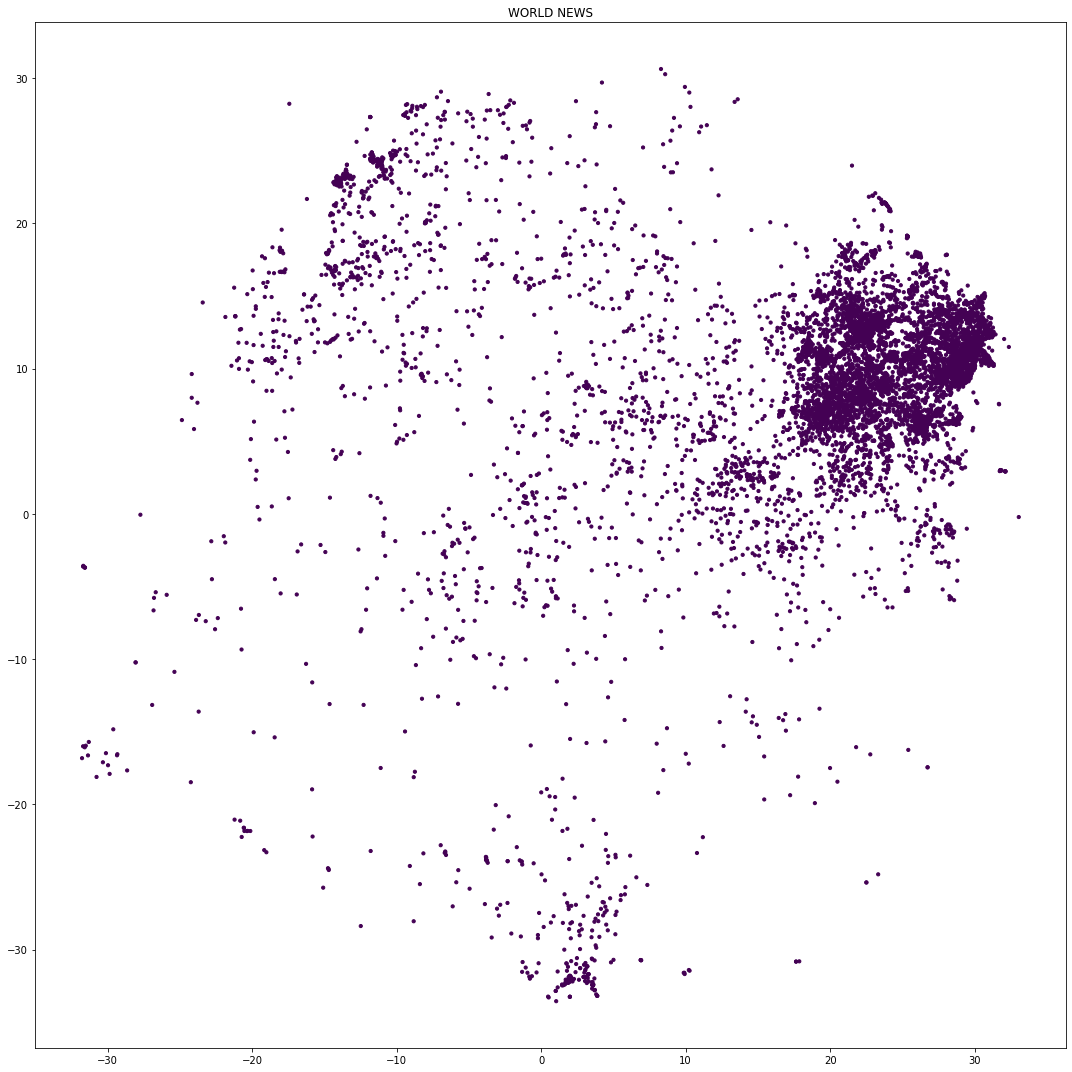

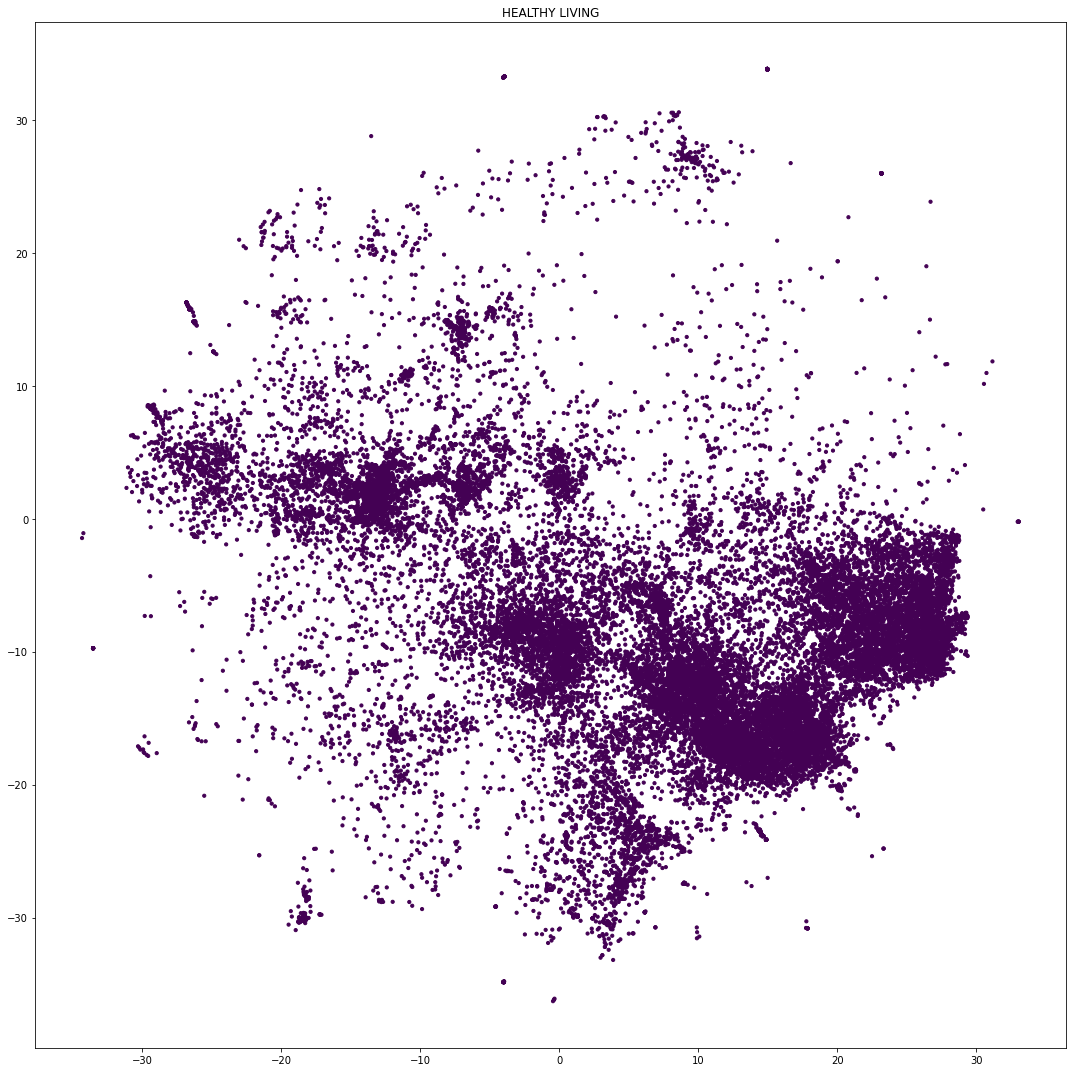

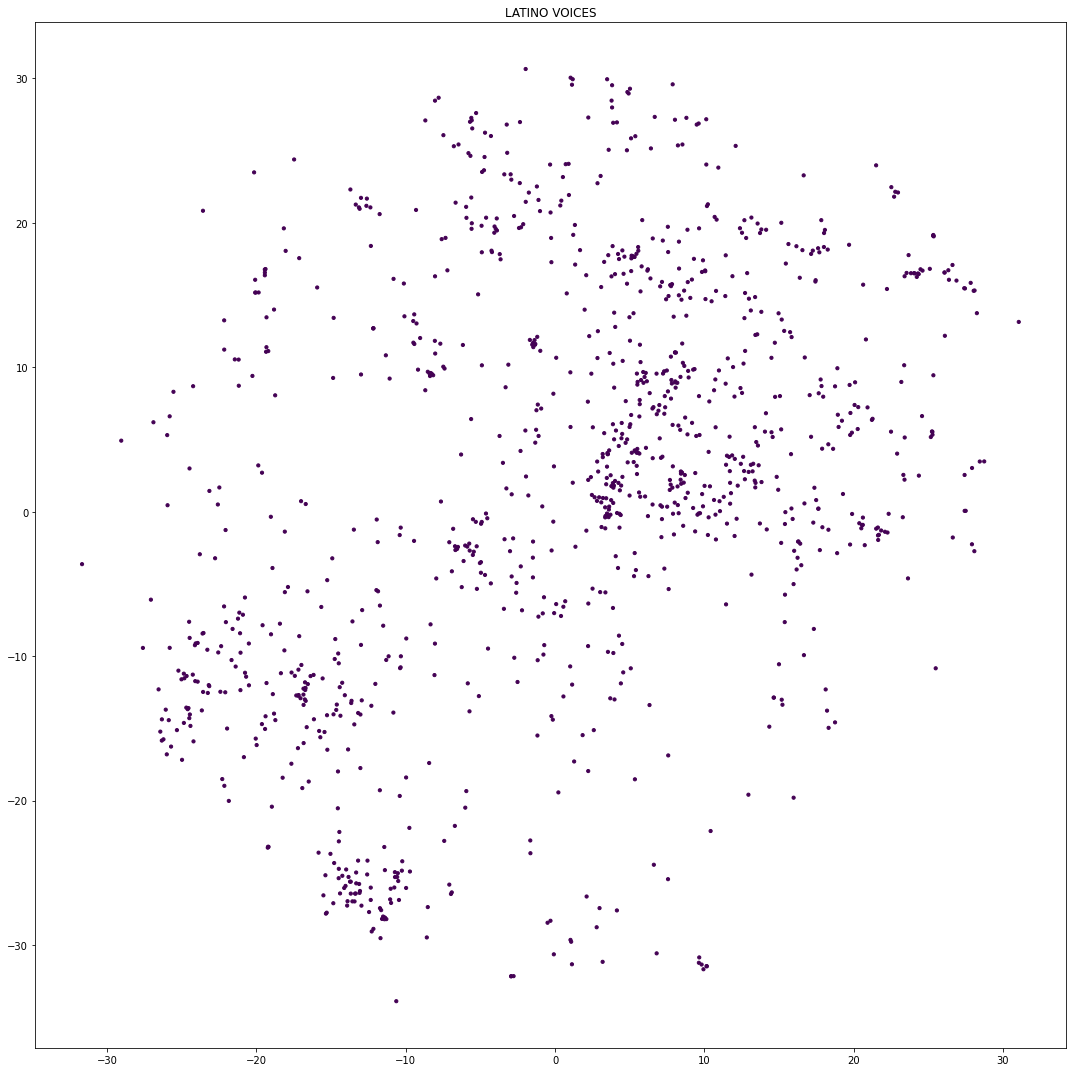

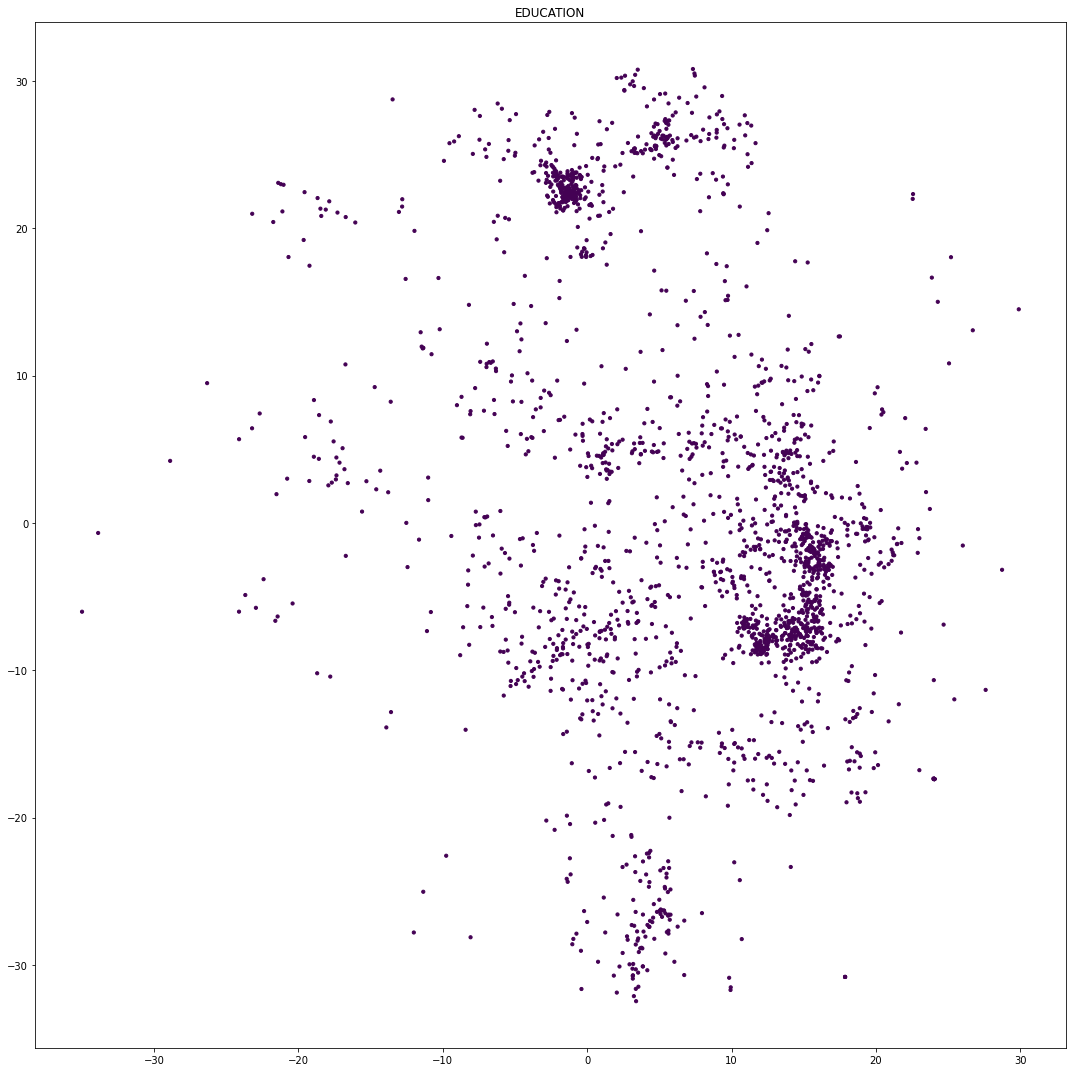

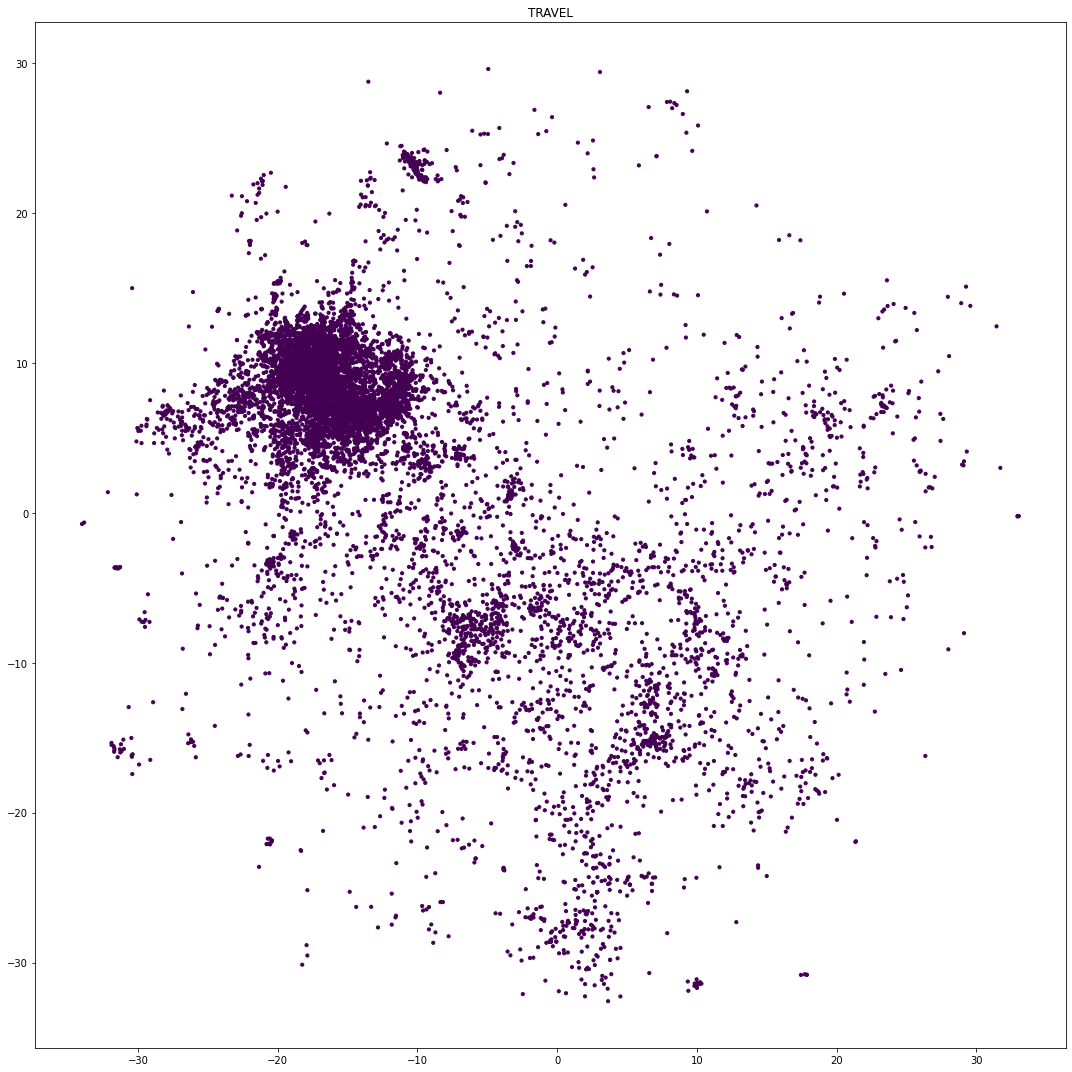

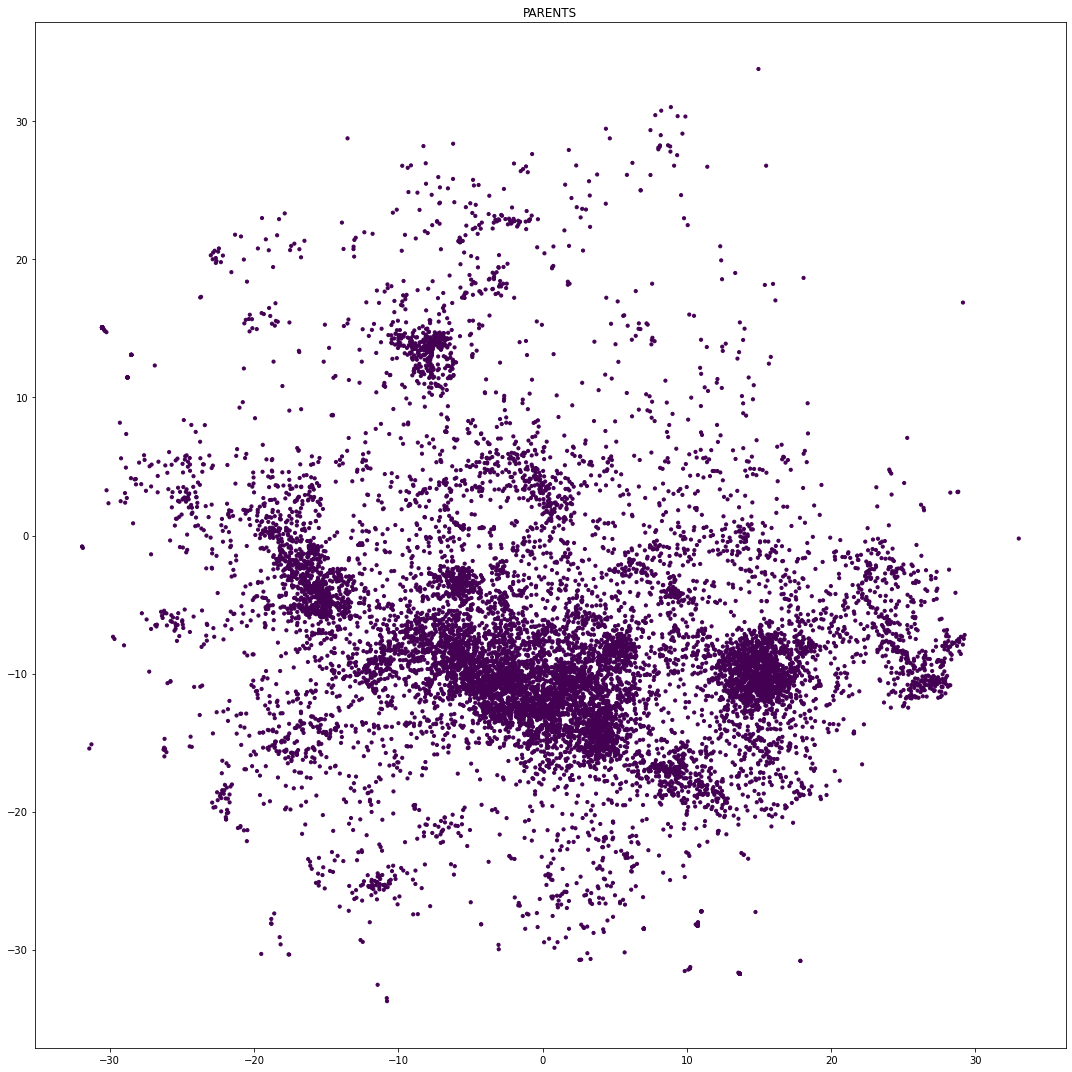

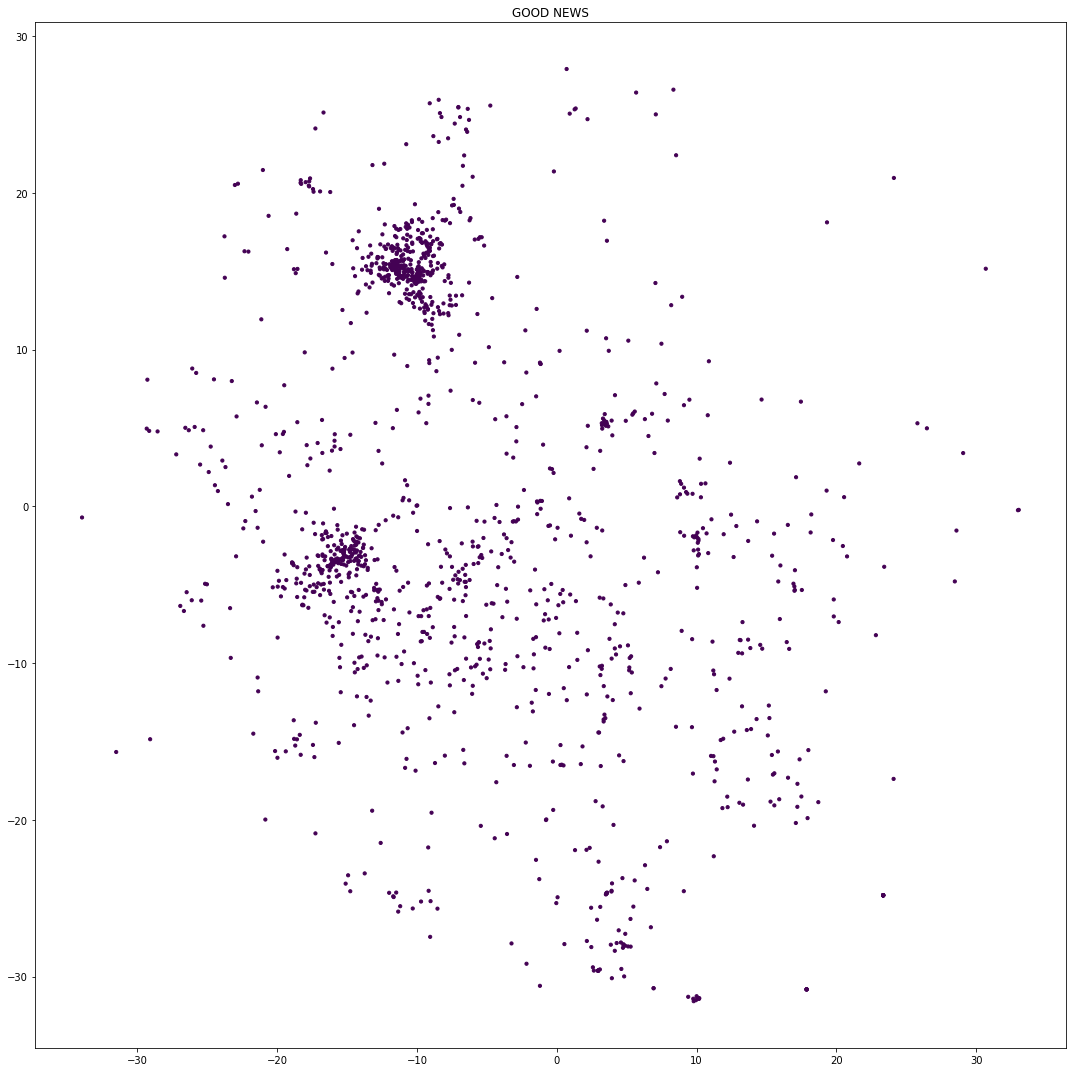

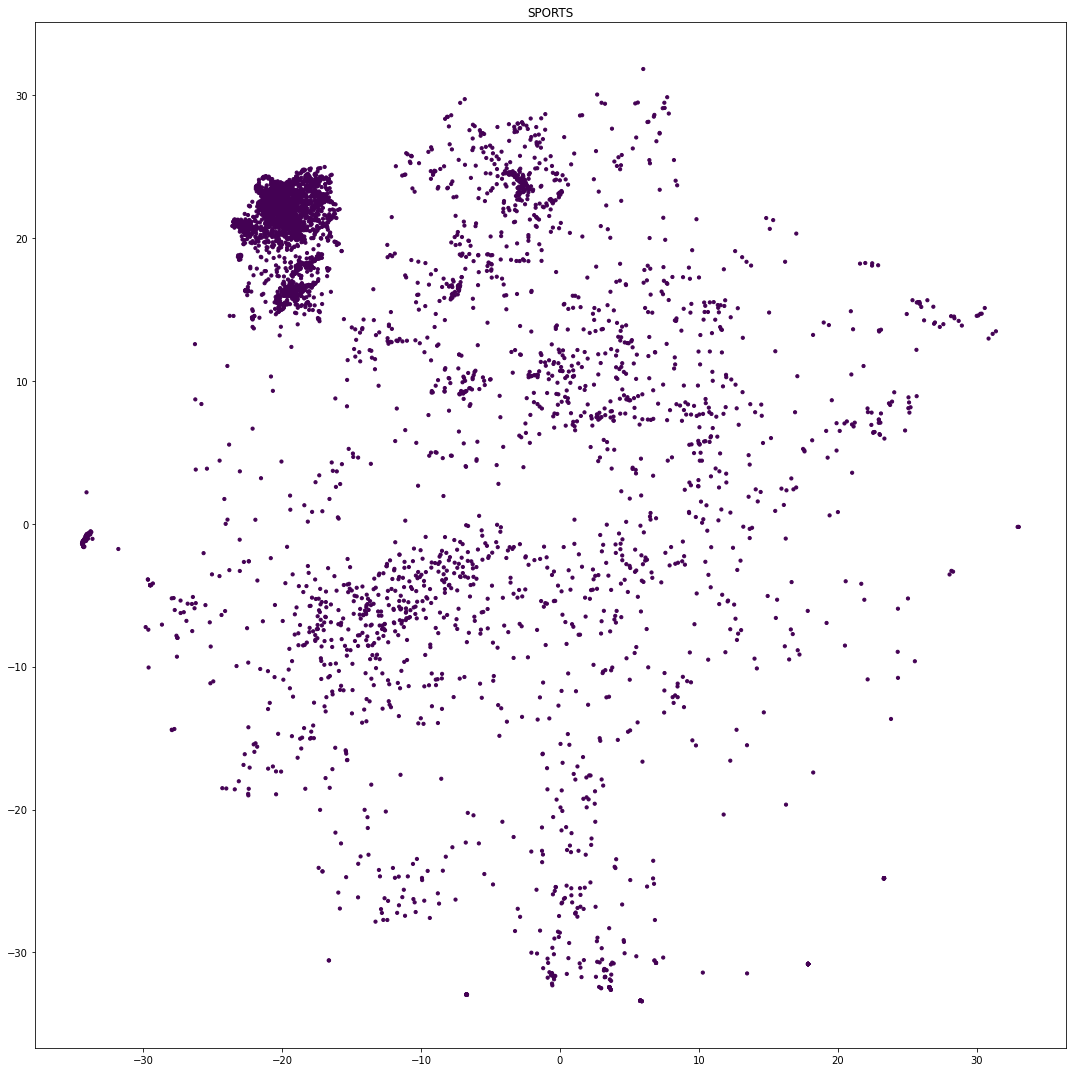

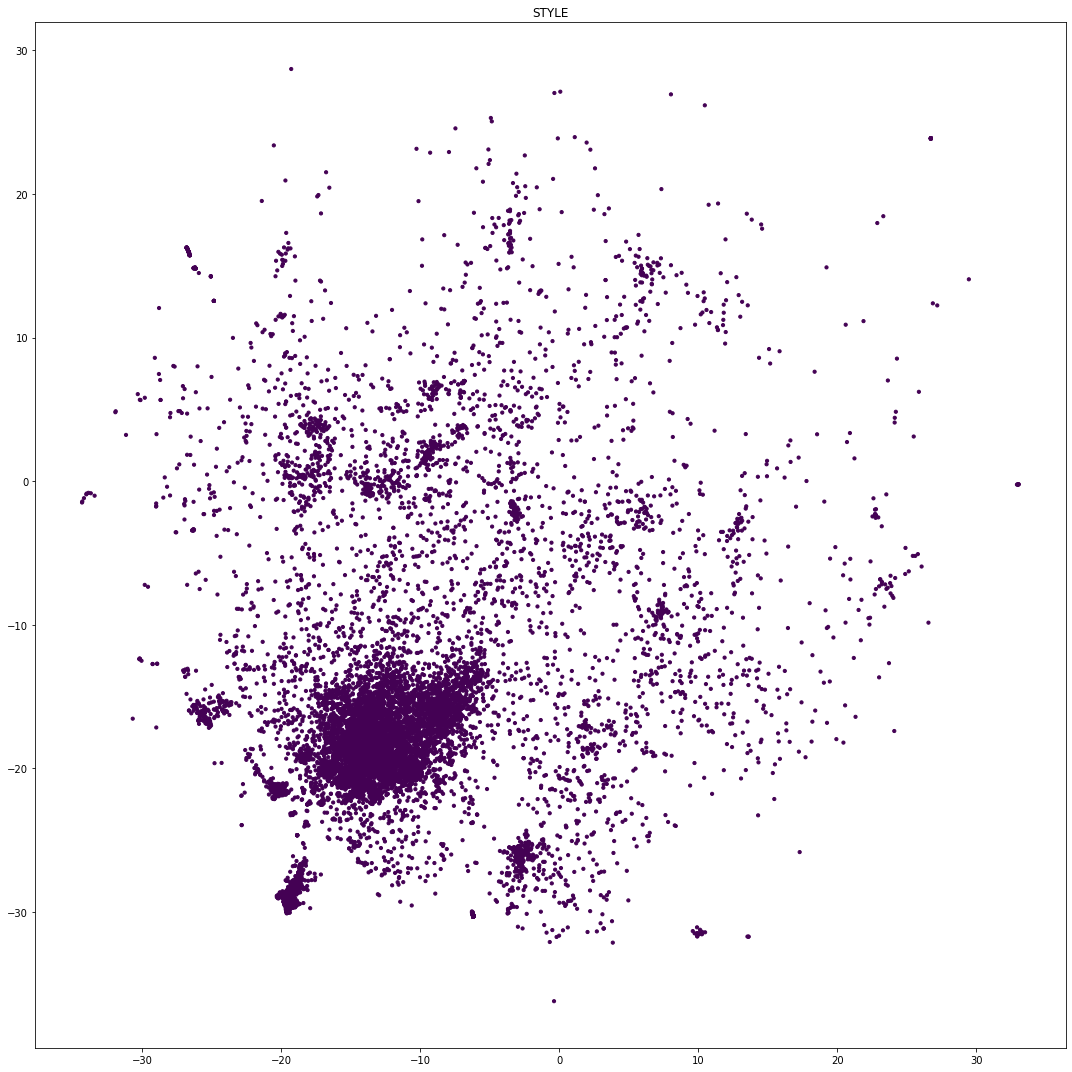

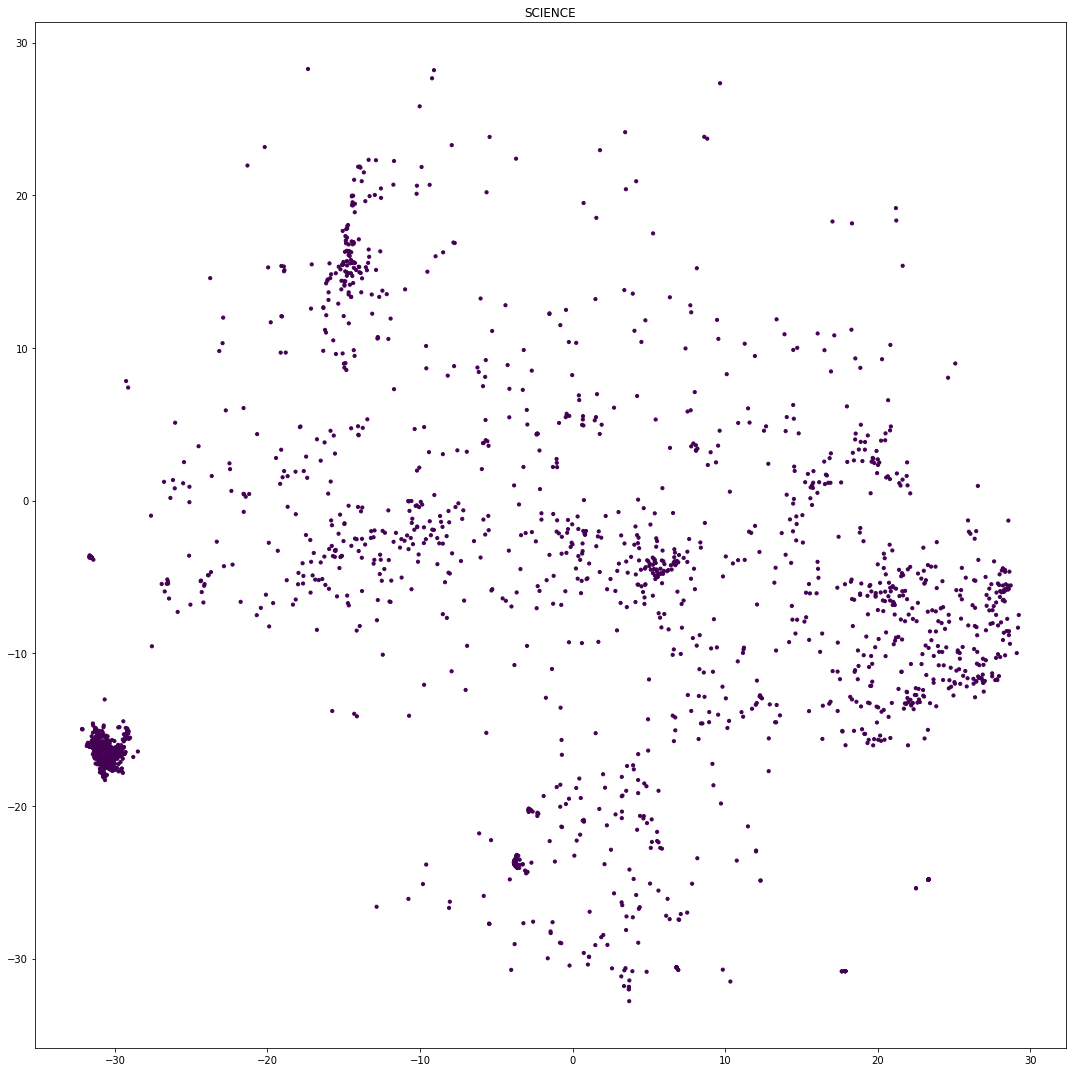

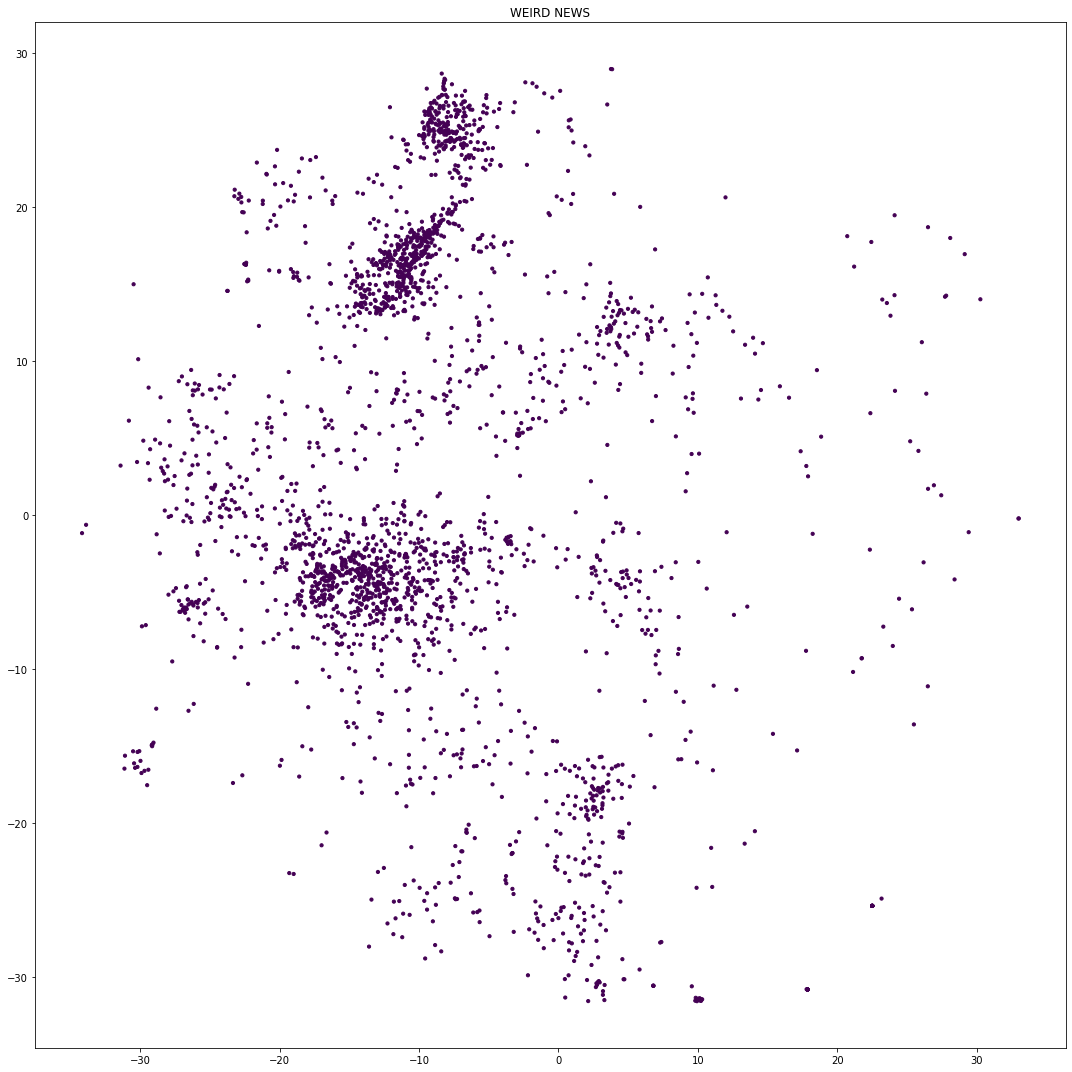

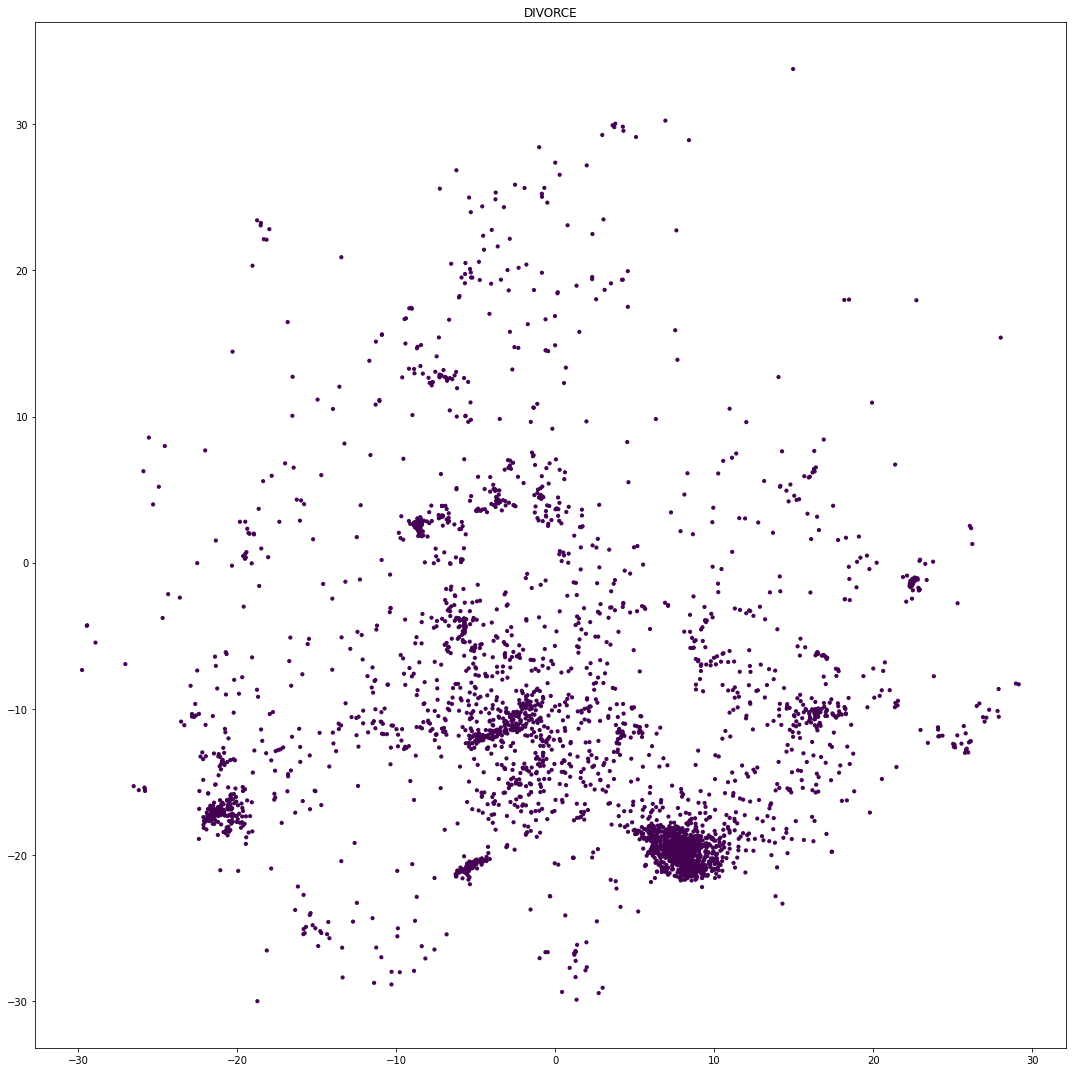

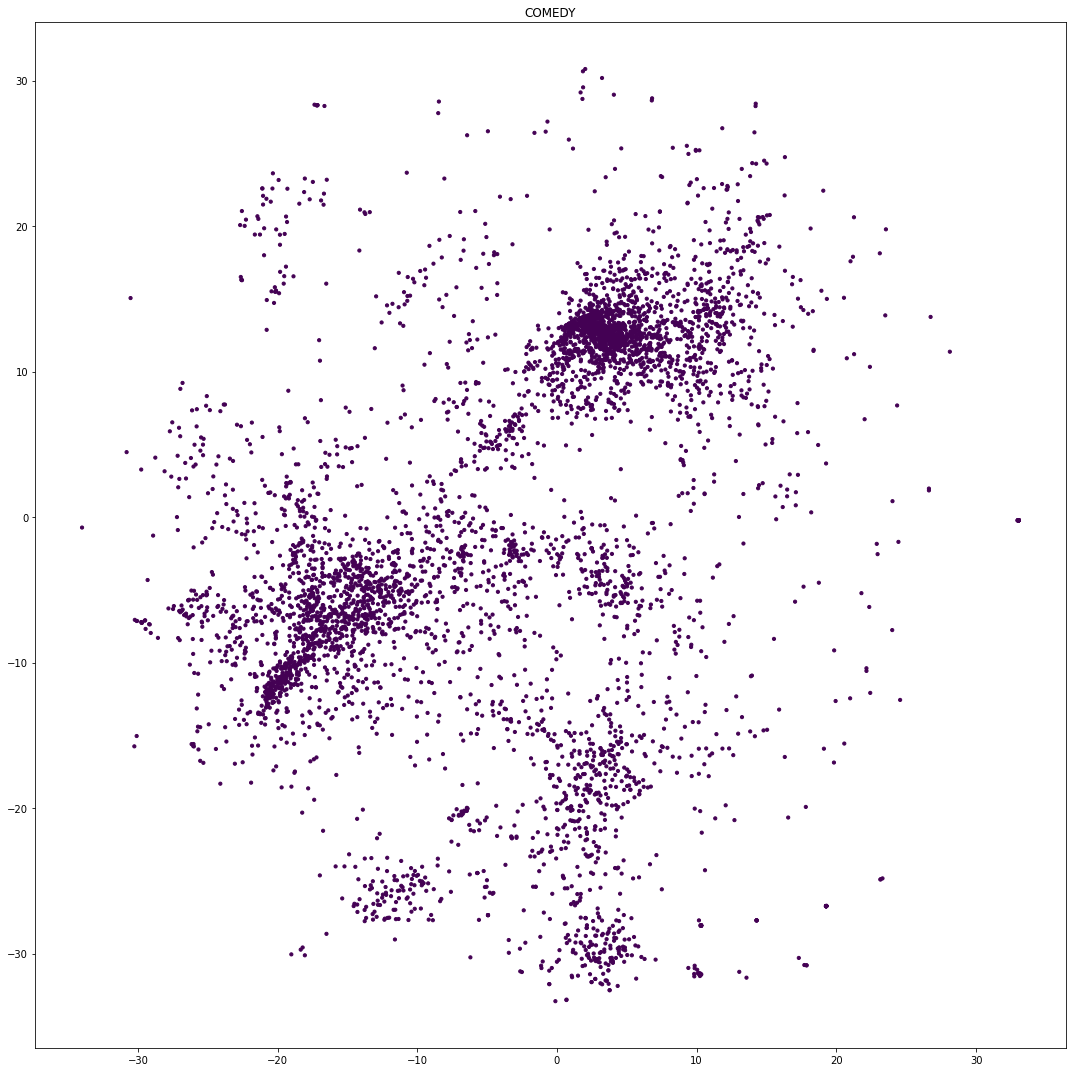

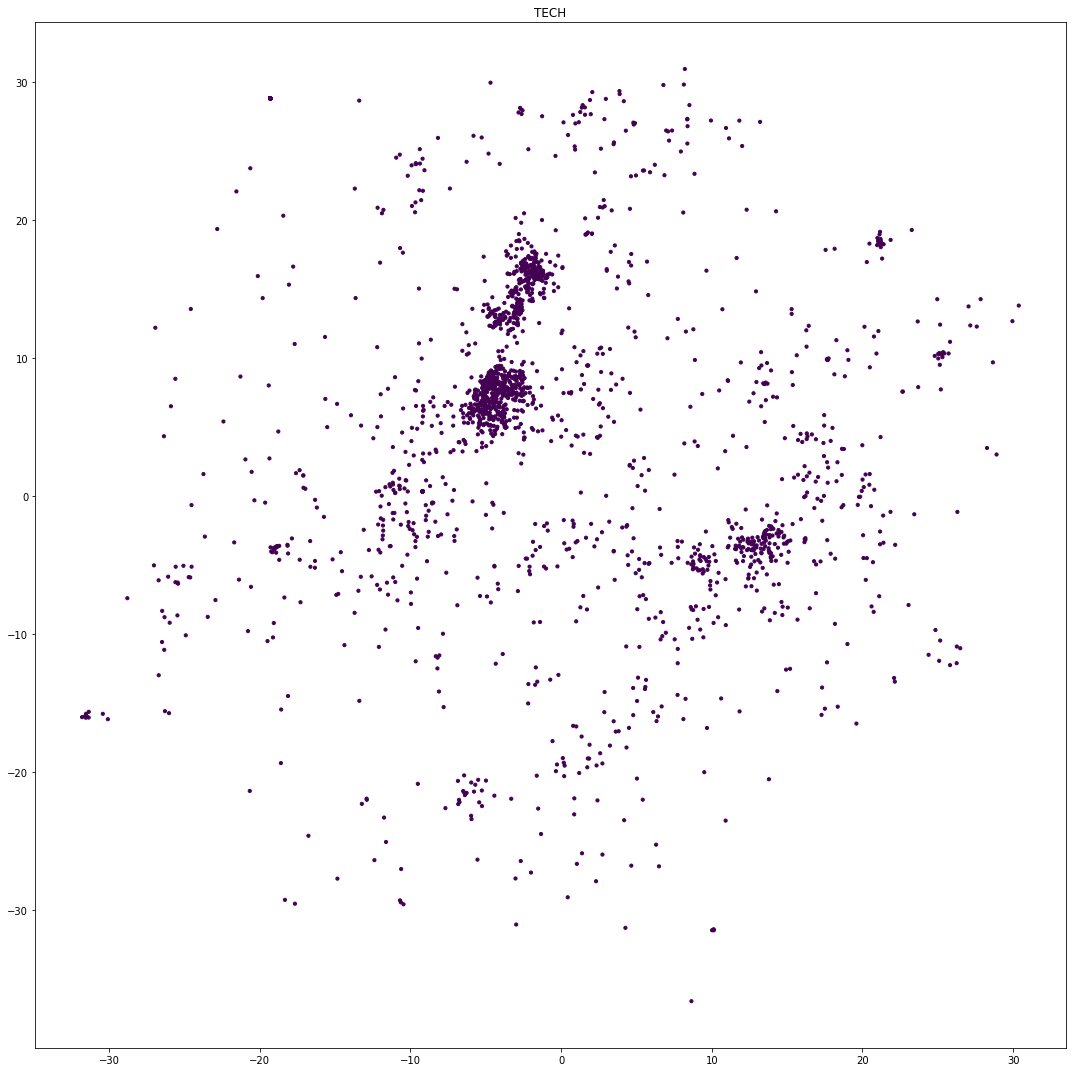

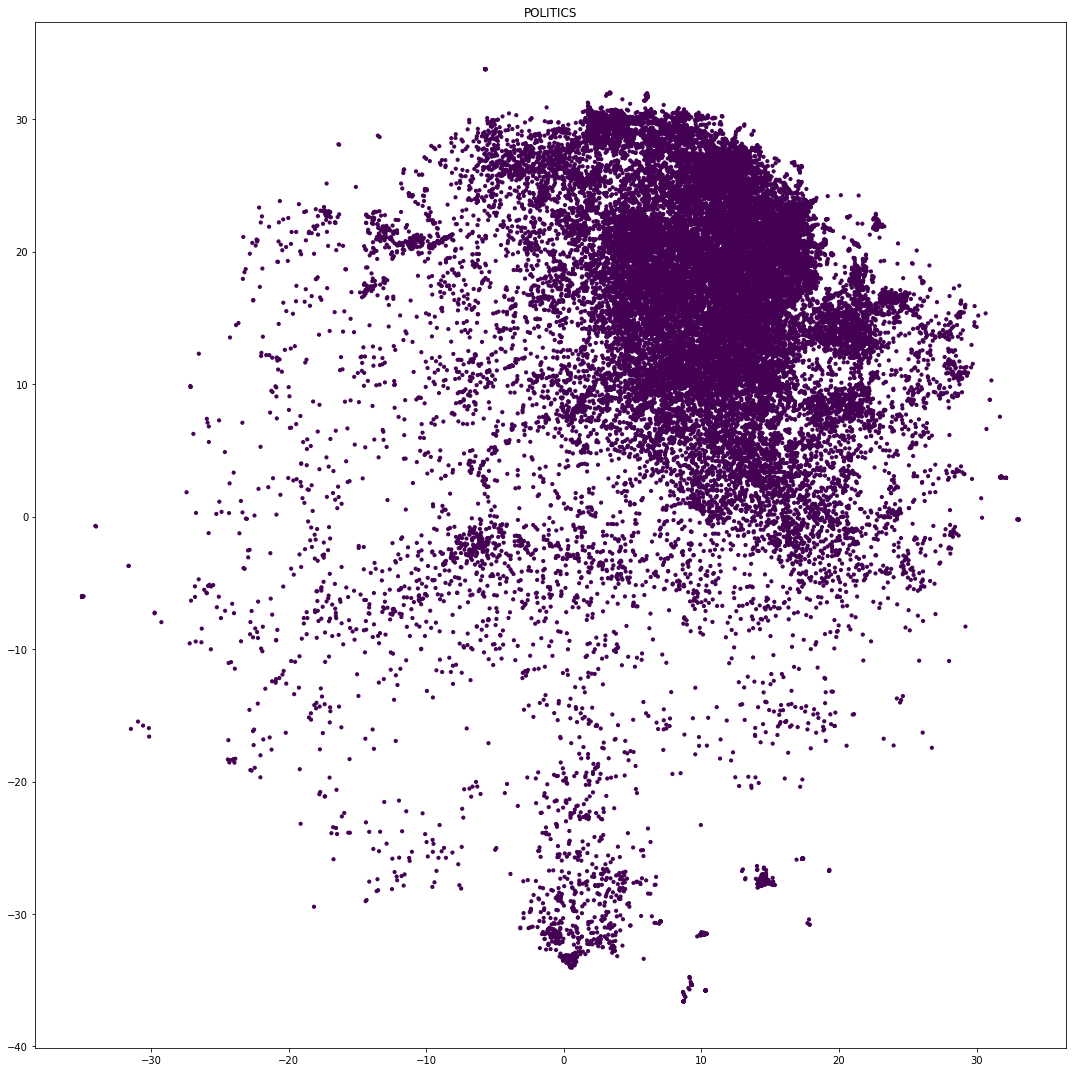

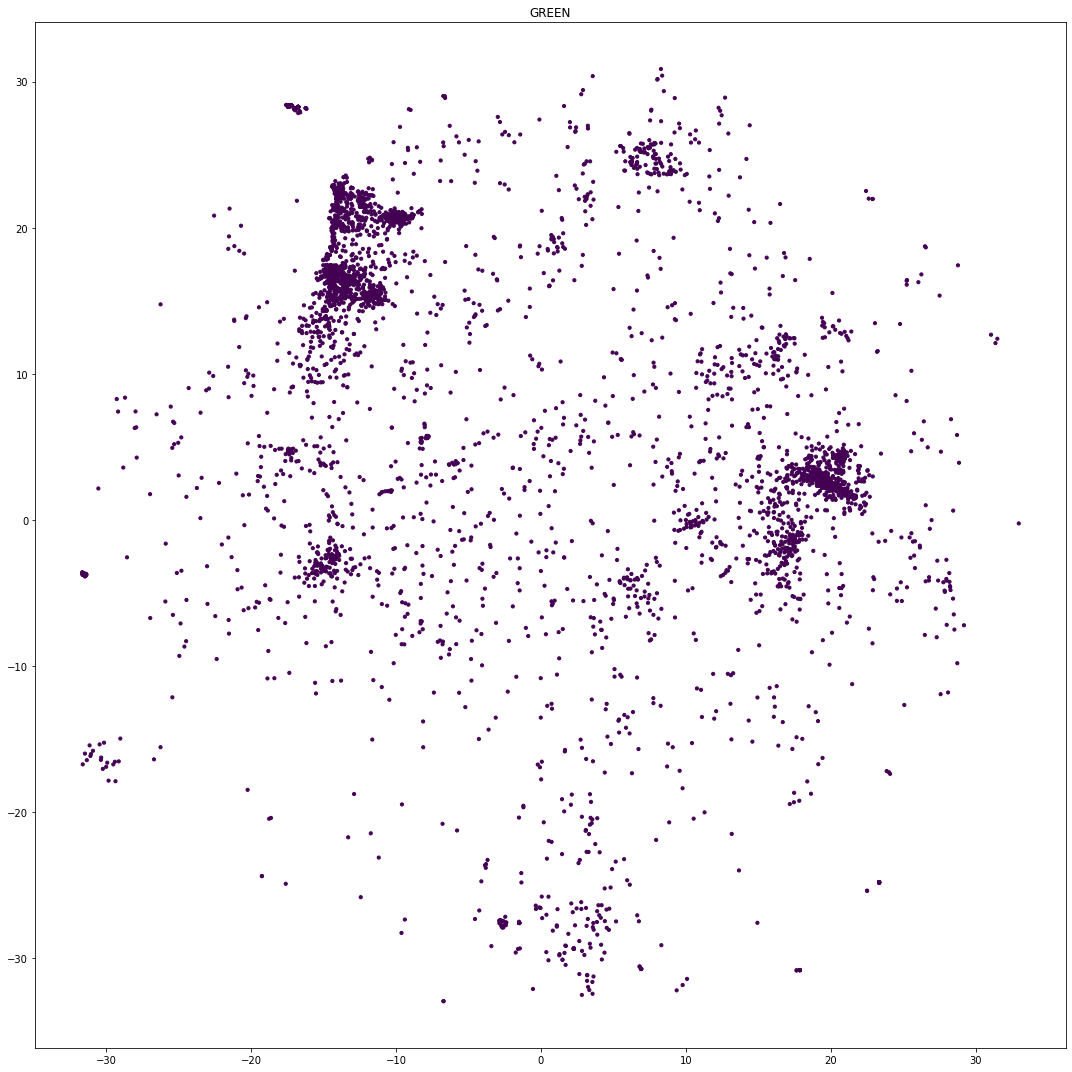

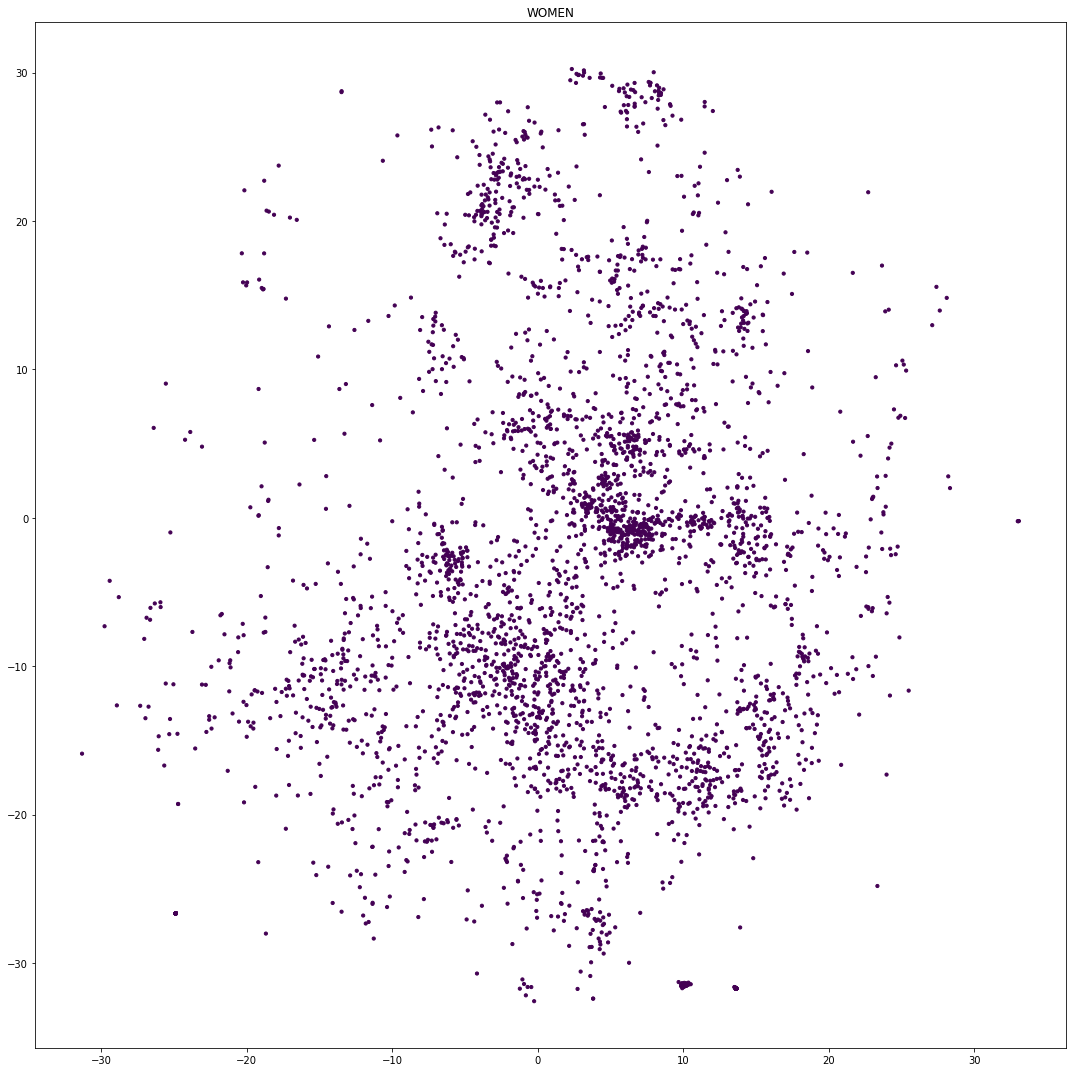

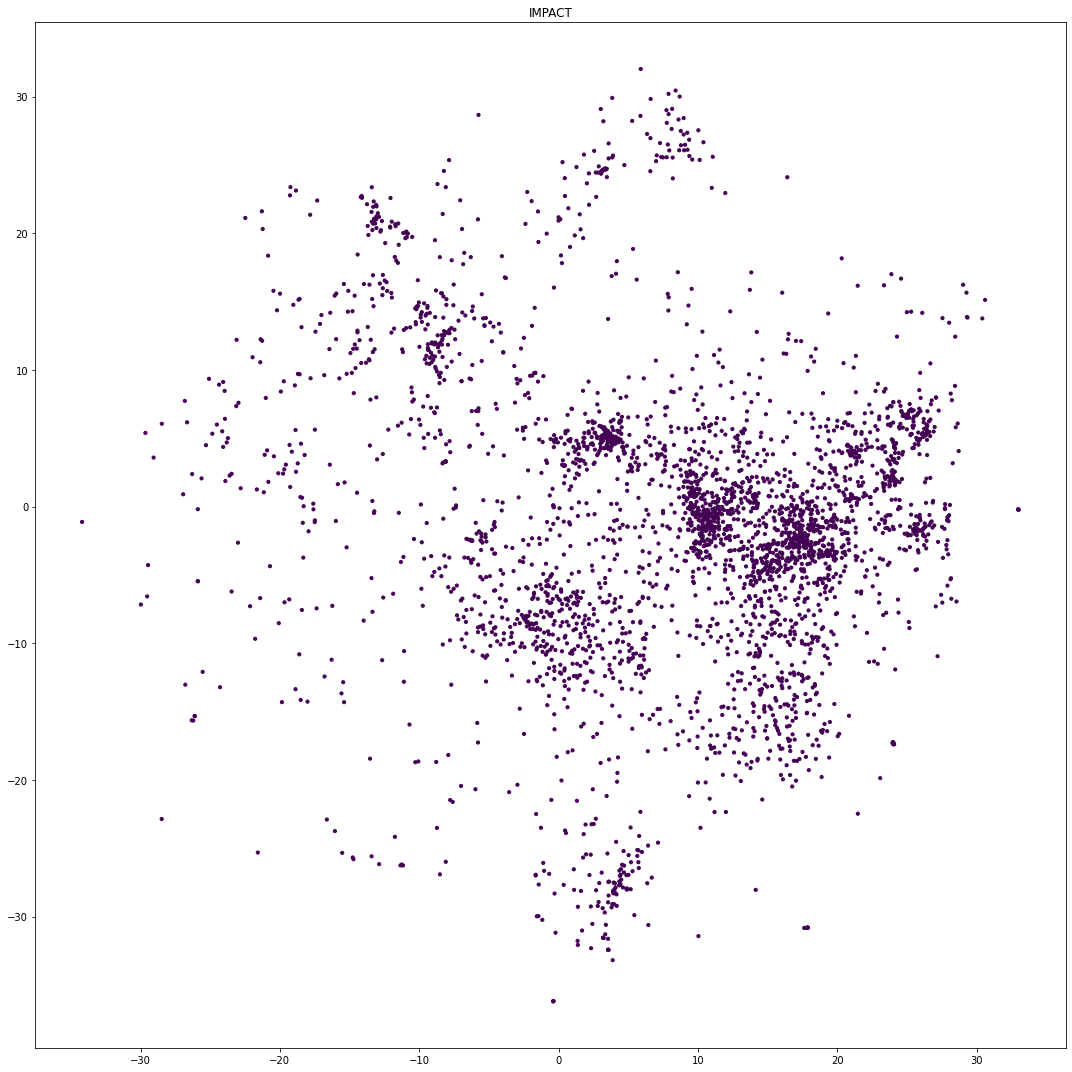

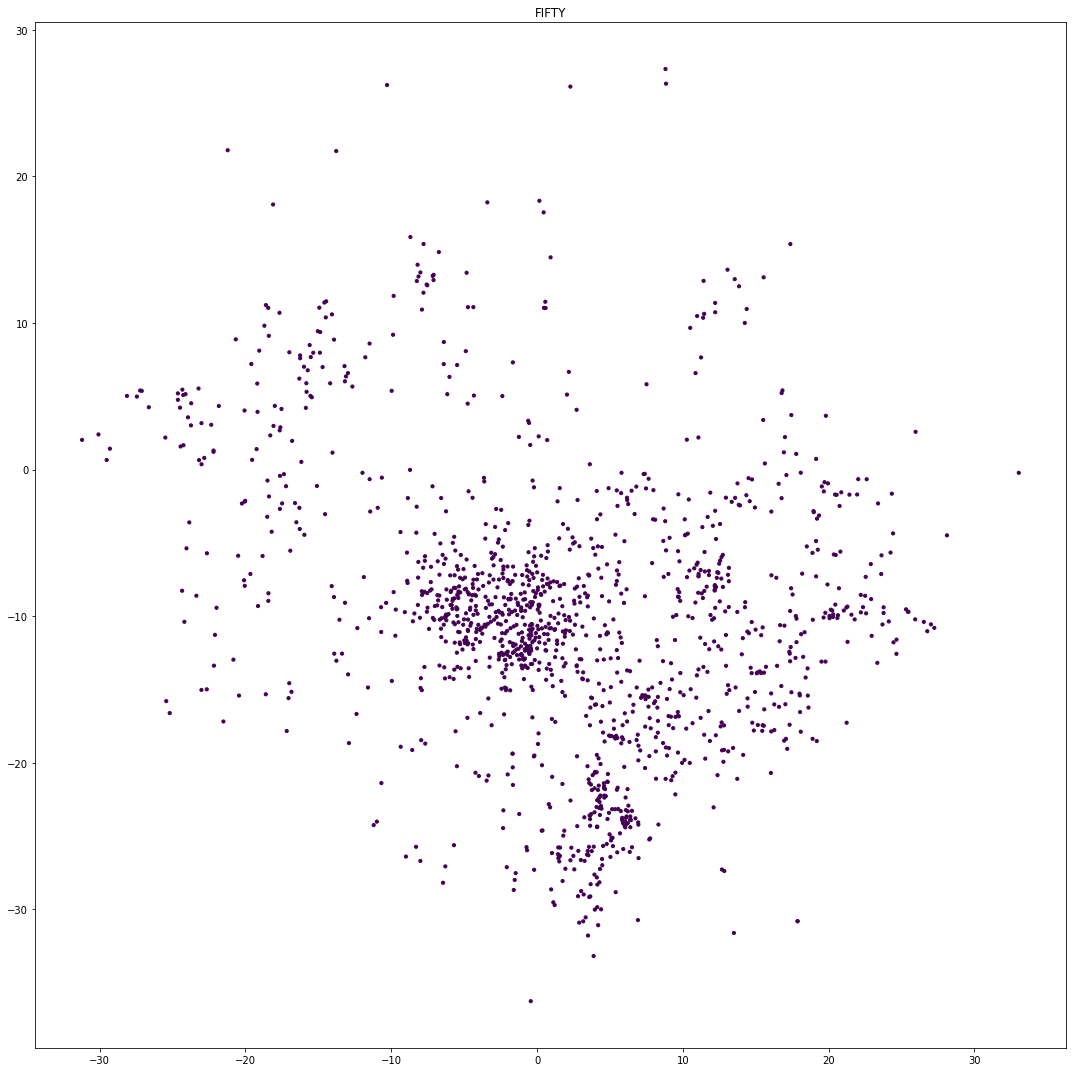

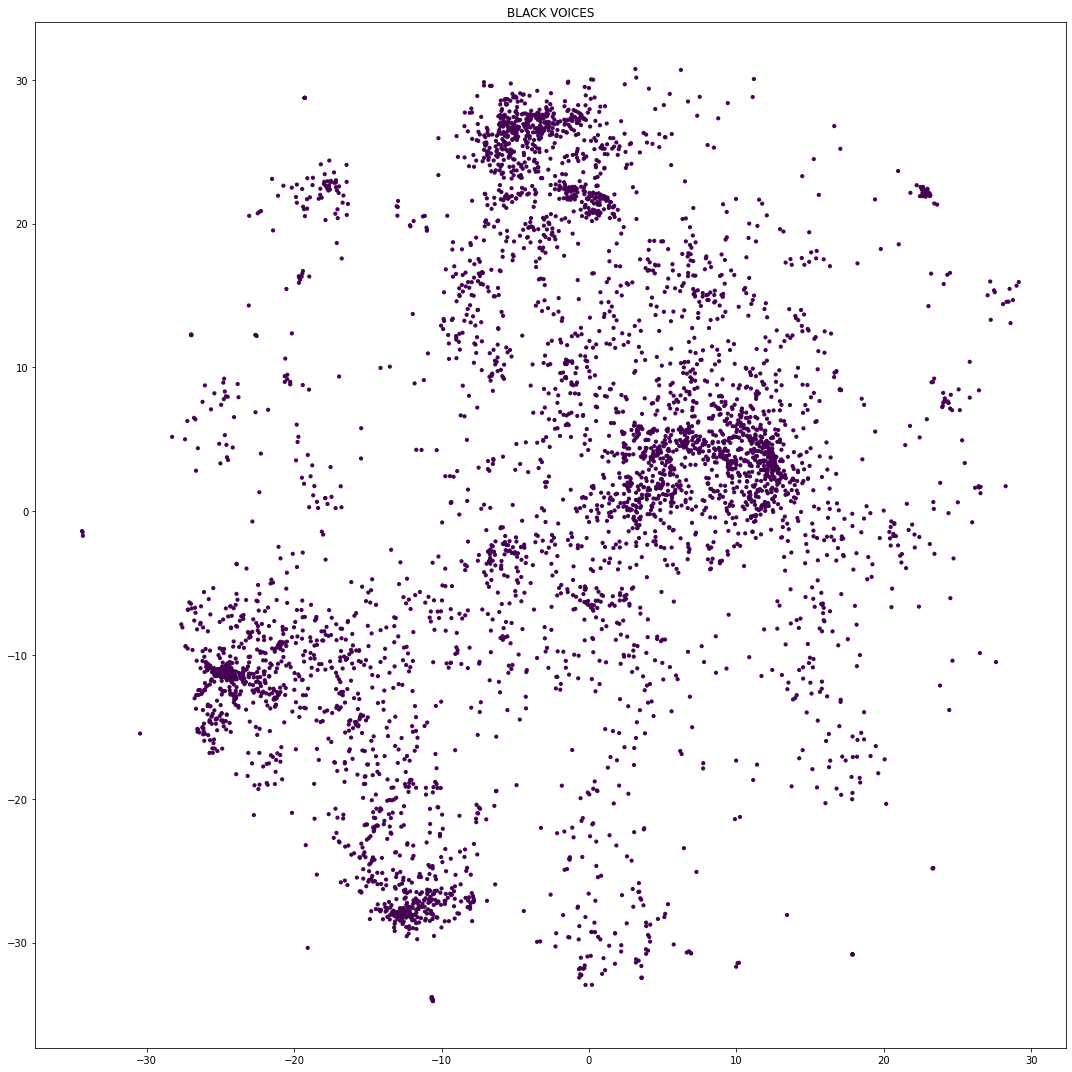

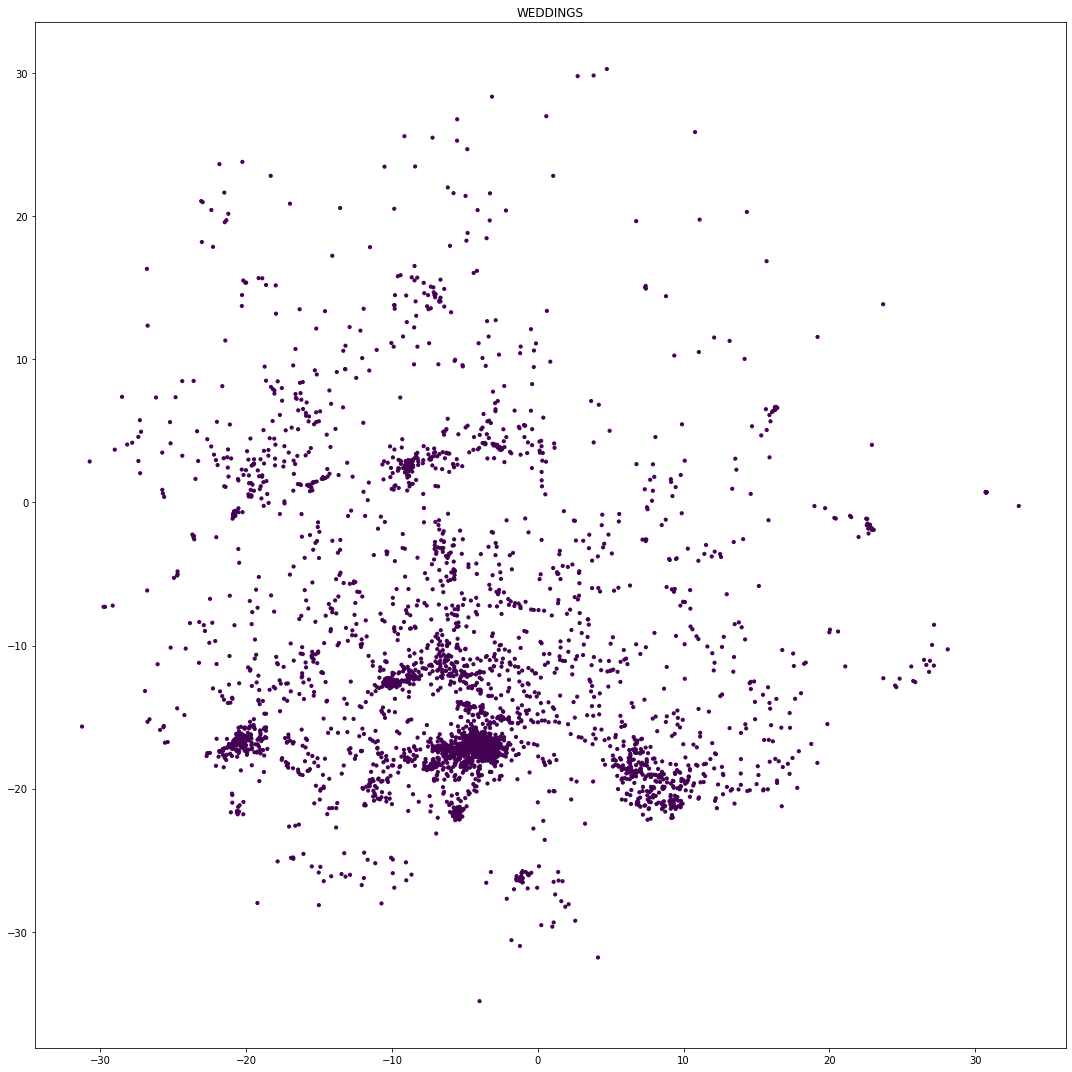

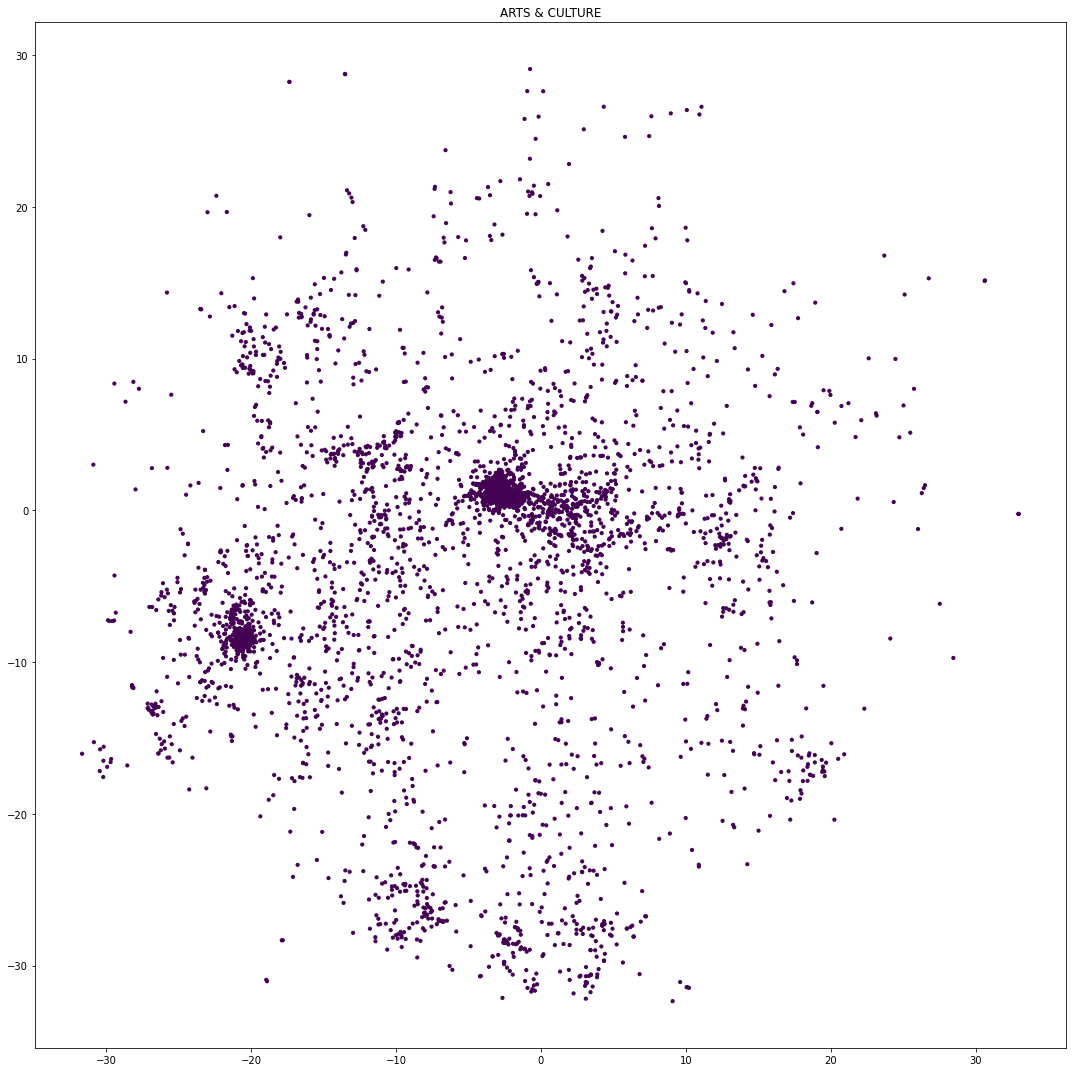

In [50]:
import os
import shutil

path = os.getcwd()
shutil.rmtree("newBERT_tSNE_figs")

init=0
new_dir = "newBERT_tSNE_figs"
parent_dir = "/scratch/sidray/Attentive-recurrent-neural-networks-for-categorizing-and-generating-news"

path = os.path.join(parent_dir, new_dir)


os.mkdir(path)
new_path = parent_dir+"/"+new_dir+"/"

titles_to_plot = ["BUSINESS", "ENTERTAINMENT", "COMEDY", "HEALTHY LIVING", "POLITICS", "PARENTS", "BLACK VOICES"]

for i in range(0,len(count_of_labels)):
    x,y=init,init+count_of_labels[i]-1
    #print(x,y)
    fig = plt.figure(figsize=(15,15))
    title_no=number_labels[init:init+count_of_labels[i]-1][-1]
    title=index_class_map_dict[title_no]
    
    plt.scatter(X_embedded[init:init+count_of_labels[i]-1,0],X_embedded[init:init+count_of_labels[i]-1,1], 10, c=number_labels[init:init+count_of_labels[i]-1])
    plt.title(title)
    file_name = new_path+"%s.png"%title
    #plt.colorbar()
    plt.tight_layout()
    plt.savefig(file_name)
    init+=count_of_labels[i]
    
req_titles = []
del_titles = []
titles = os.listdir(new_path)
for item in titles:
    if item.split(".")[0] in titles_to_plot:
        req_titles.append(item.split(".")[0]) 
    
print(req_titles)
    
    
